
<p style="text-align:left">
   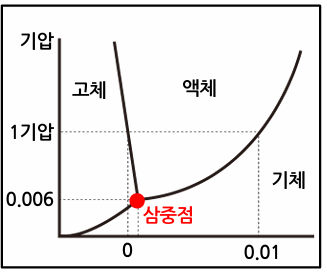
</p>


-  삼중점은 특정 압력과 온도에서 물이 고체, 액체, 기체 세 가지 상태로 공존하는 점입니다.
-  물의 삼중점은 273.16K (0.01°C)에서 정의됩니다.
-  이 삼중점을 이용하여 절대 영도(0K)와 섭씨로의 변환점을 결정할 수 있습니다.


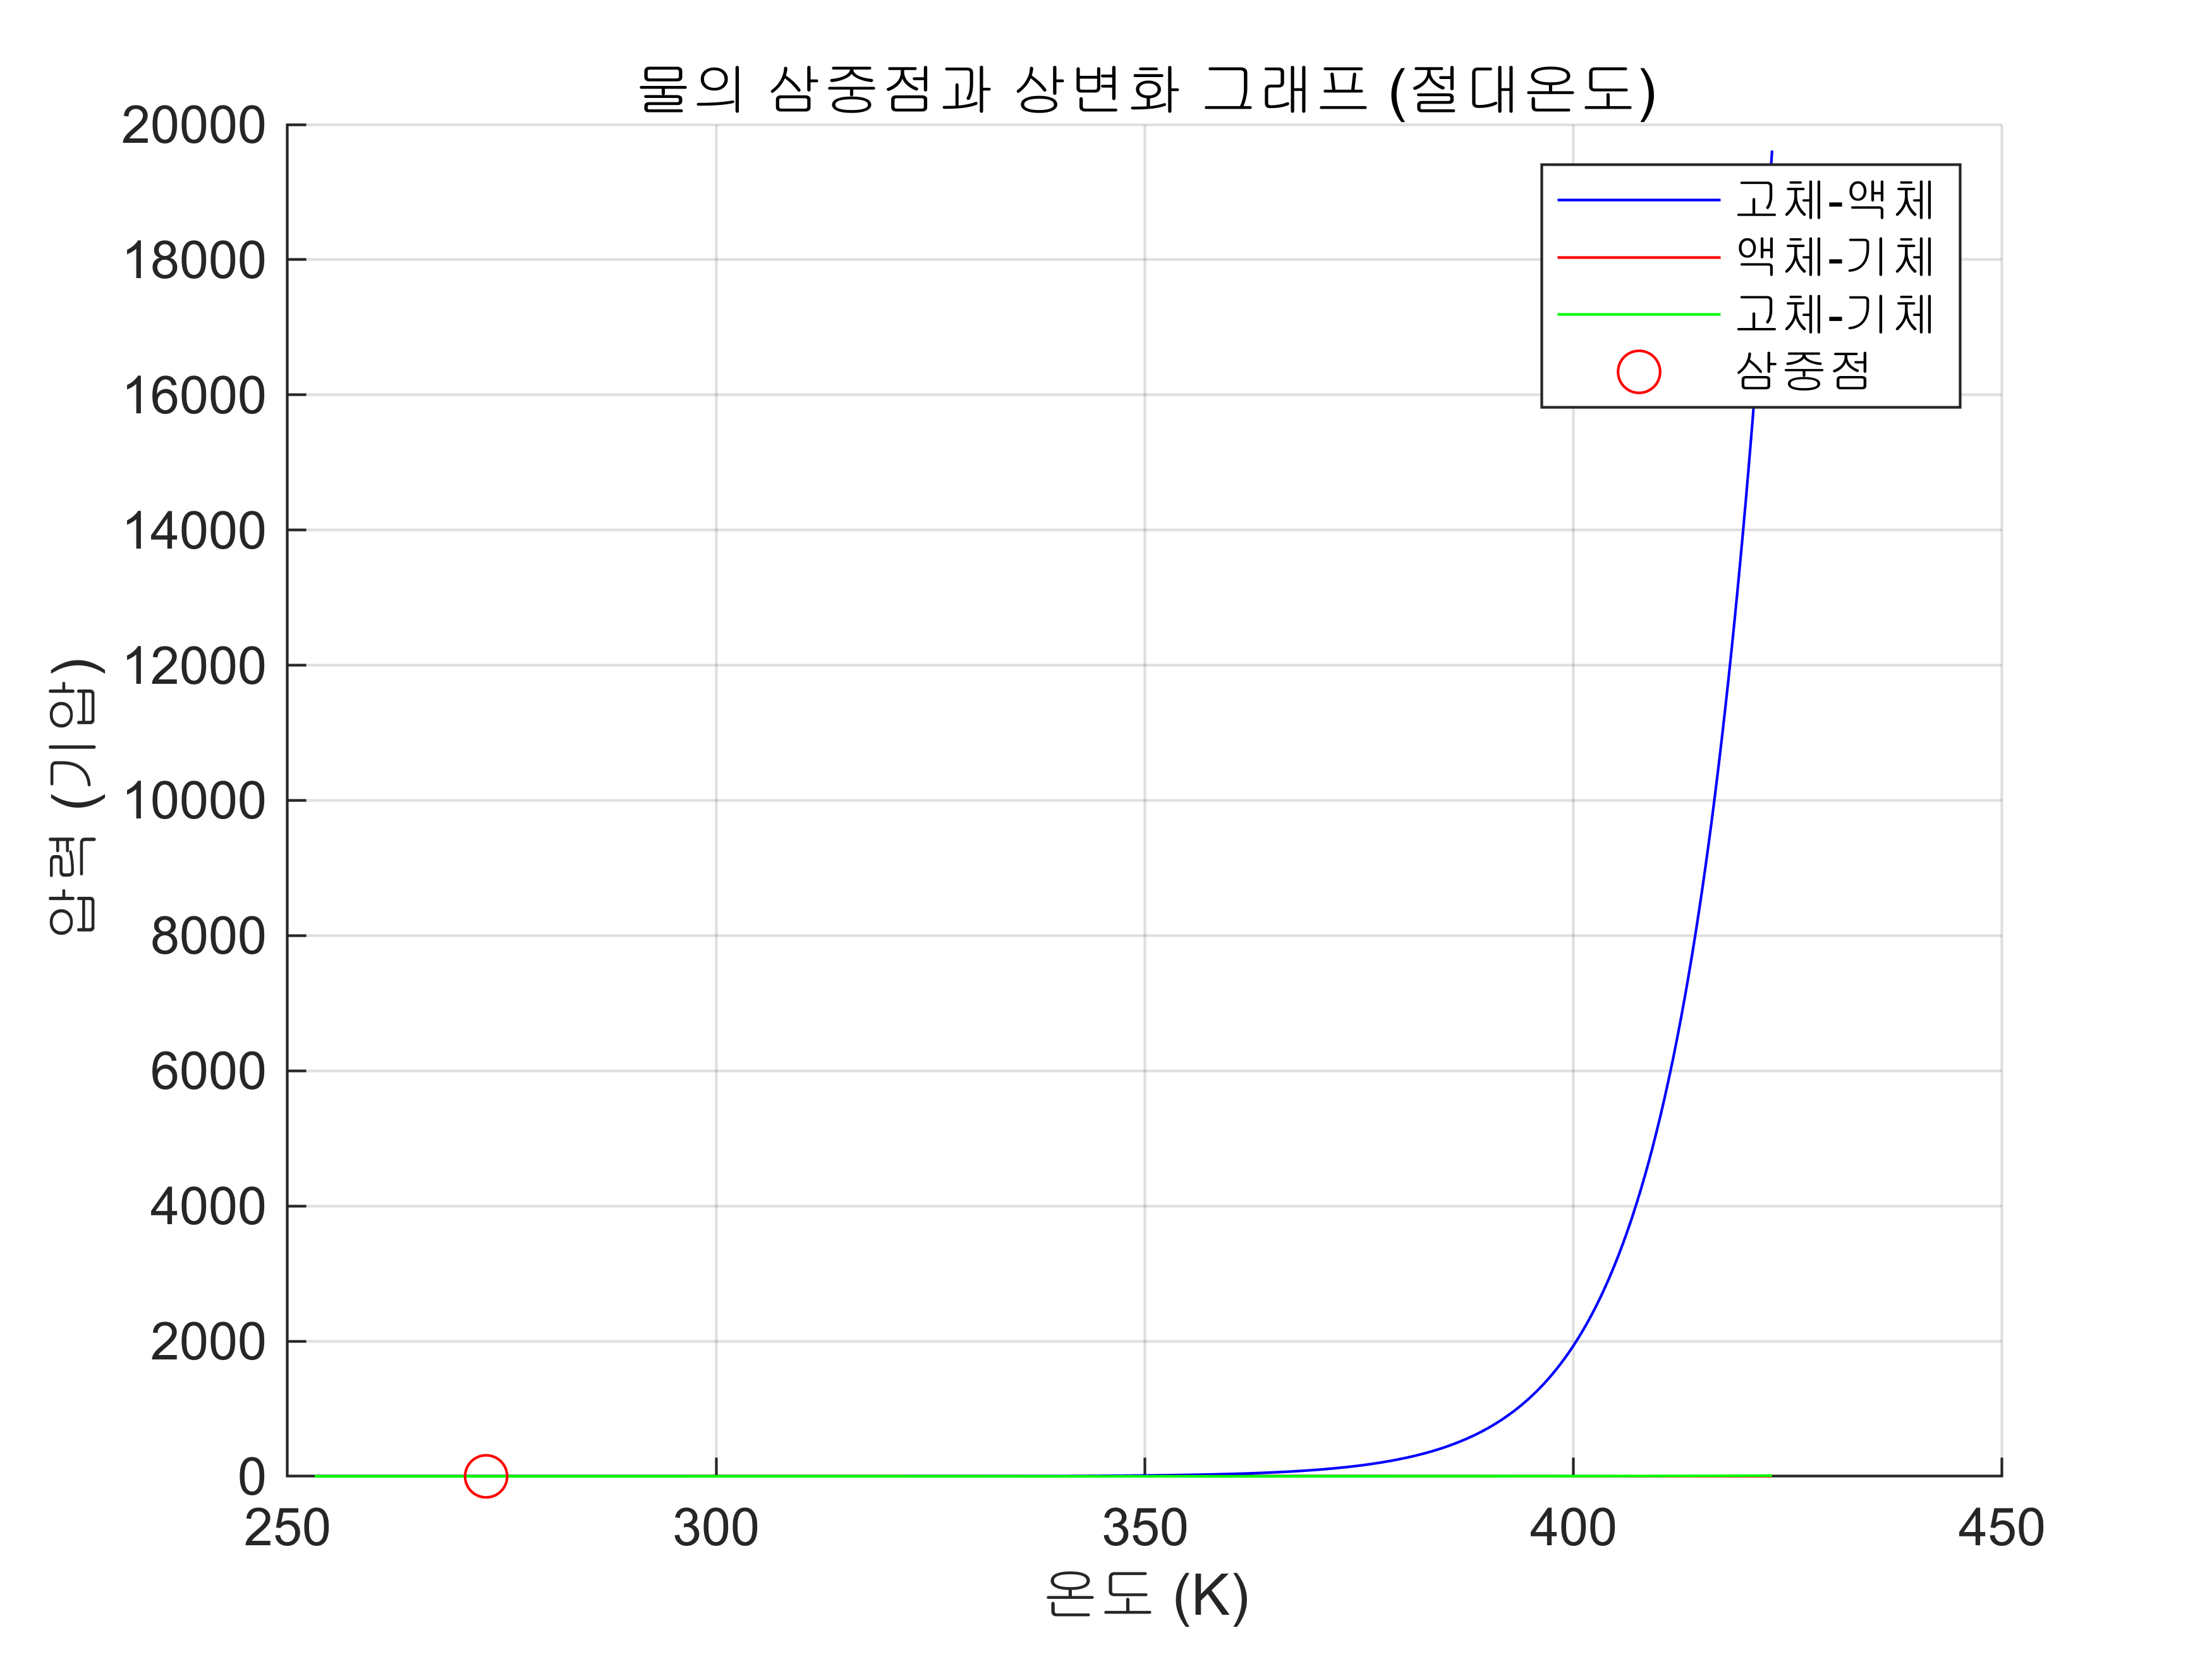

In [1]:
% 온도 범위 (켈빈으로 표현)
T = linspace(253.16, 423.16, 500); % 253.16K(-20°C)에서 423.16K(150°C)까지

% 물의 삼중점
T_triple = 273.16; % K
P_triple = 0.006; % 기압

% 상태 방정식을 간단하게 정의 (고체-액체, 액체-기체, 고체-기체)
P_solid_liquid = @(T) 0.006 * exp(0.1 * (T - T_triple)); % 임의 모델
P_liquid_gas = @(T) 0.006 + 0.01 * (T - T_triple); % 임의 모델
P_solid_gas = @(T) 0.006 * exp(0.05 * (T - T_triple)); % 임의 모델

% 압력 계산
P_solid_liquid_curve = P_solid_liquid(T);
P_liquid_gas_curve = P_liquid_gas(T);
P_solid_gas_curve = P_solid_gas(T);

% 그래프 그리기
figure;
hold on;
plot(T, P_solid_liquid_curve, 'b', 'DisplayName', '고체-액체');
plot(T, P_liquid_gas_curve, 'r', 'DisplayName', '액체-기체');
plot(T, P_solid_gas_curve, 'g', 'DisplayName', '고체-기체');
plot(T_triple, P_triple, 'ro', 'MarkerSize', 8, 'DisplayName', '삼중점');
xlabel('온도 (K)');
ylabel('압력 (기압)');
title('물의 삼중점과 상변화 그래프 (절대온도)');
legend;
grid on;
hold off;


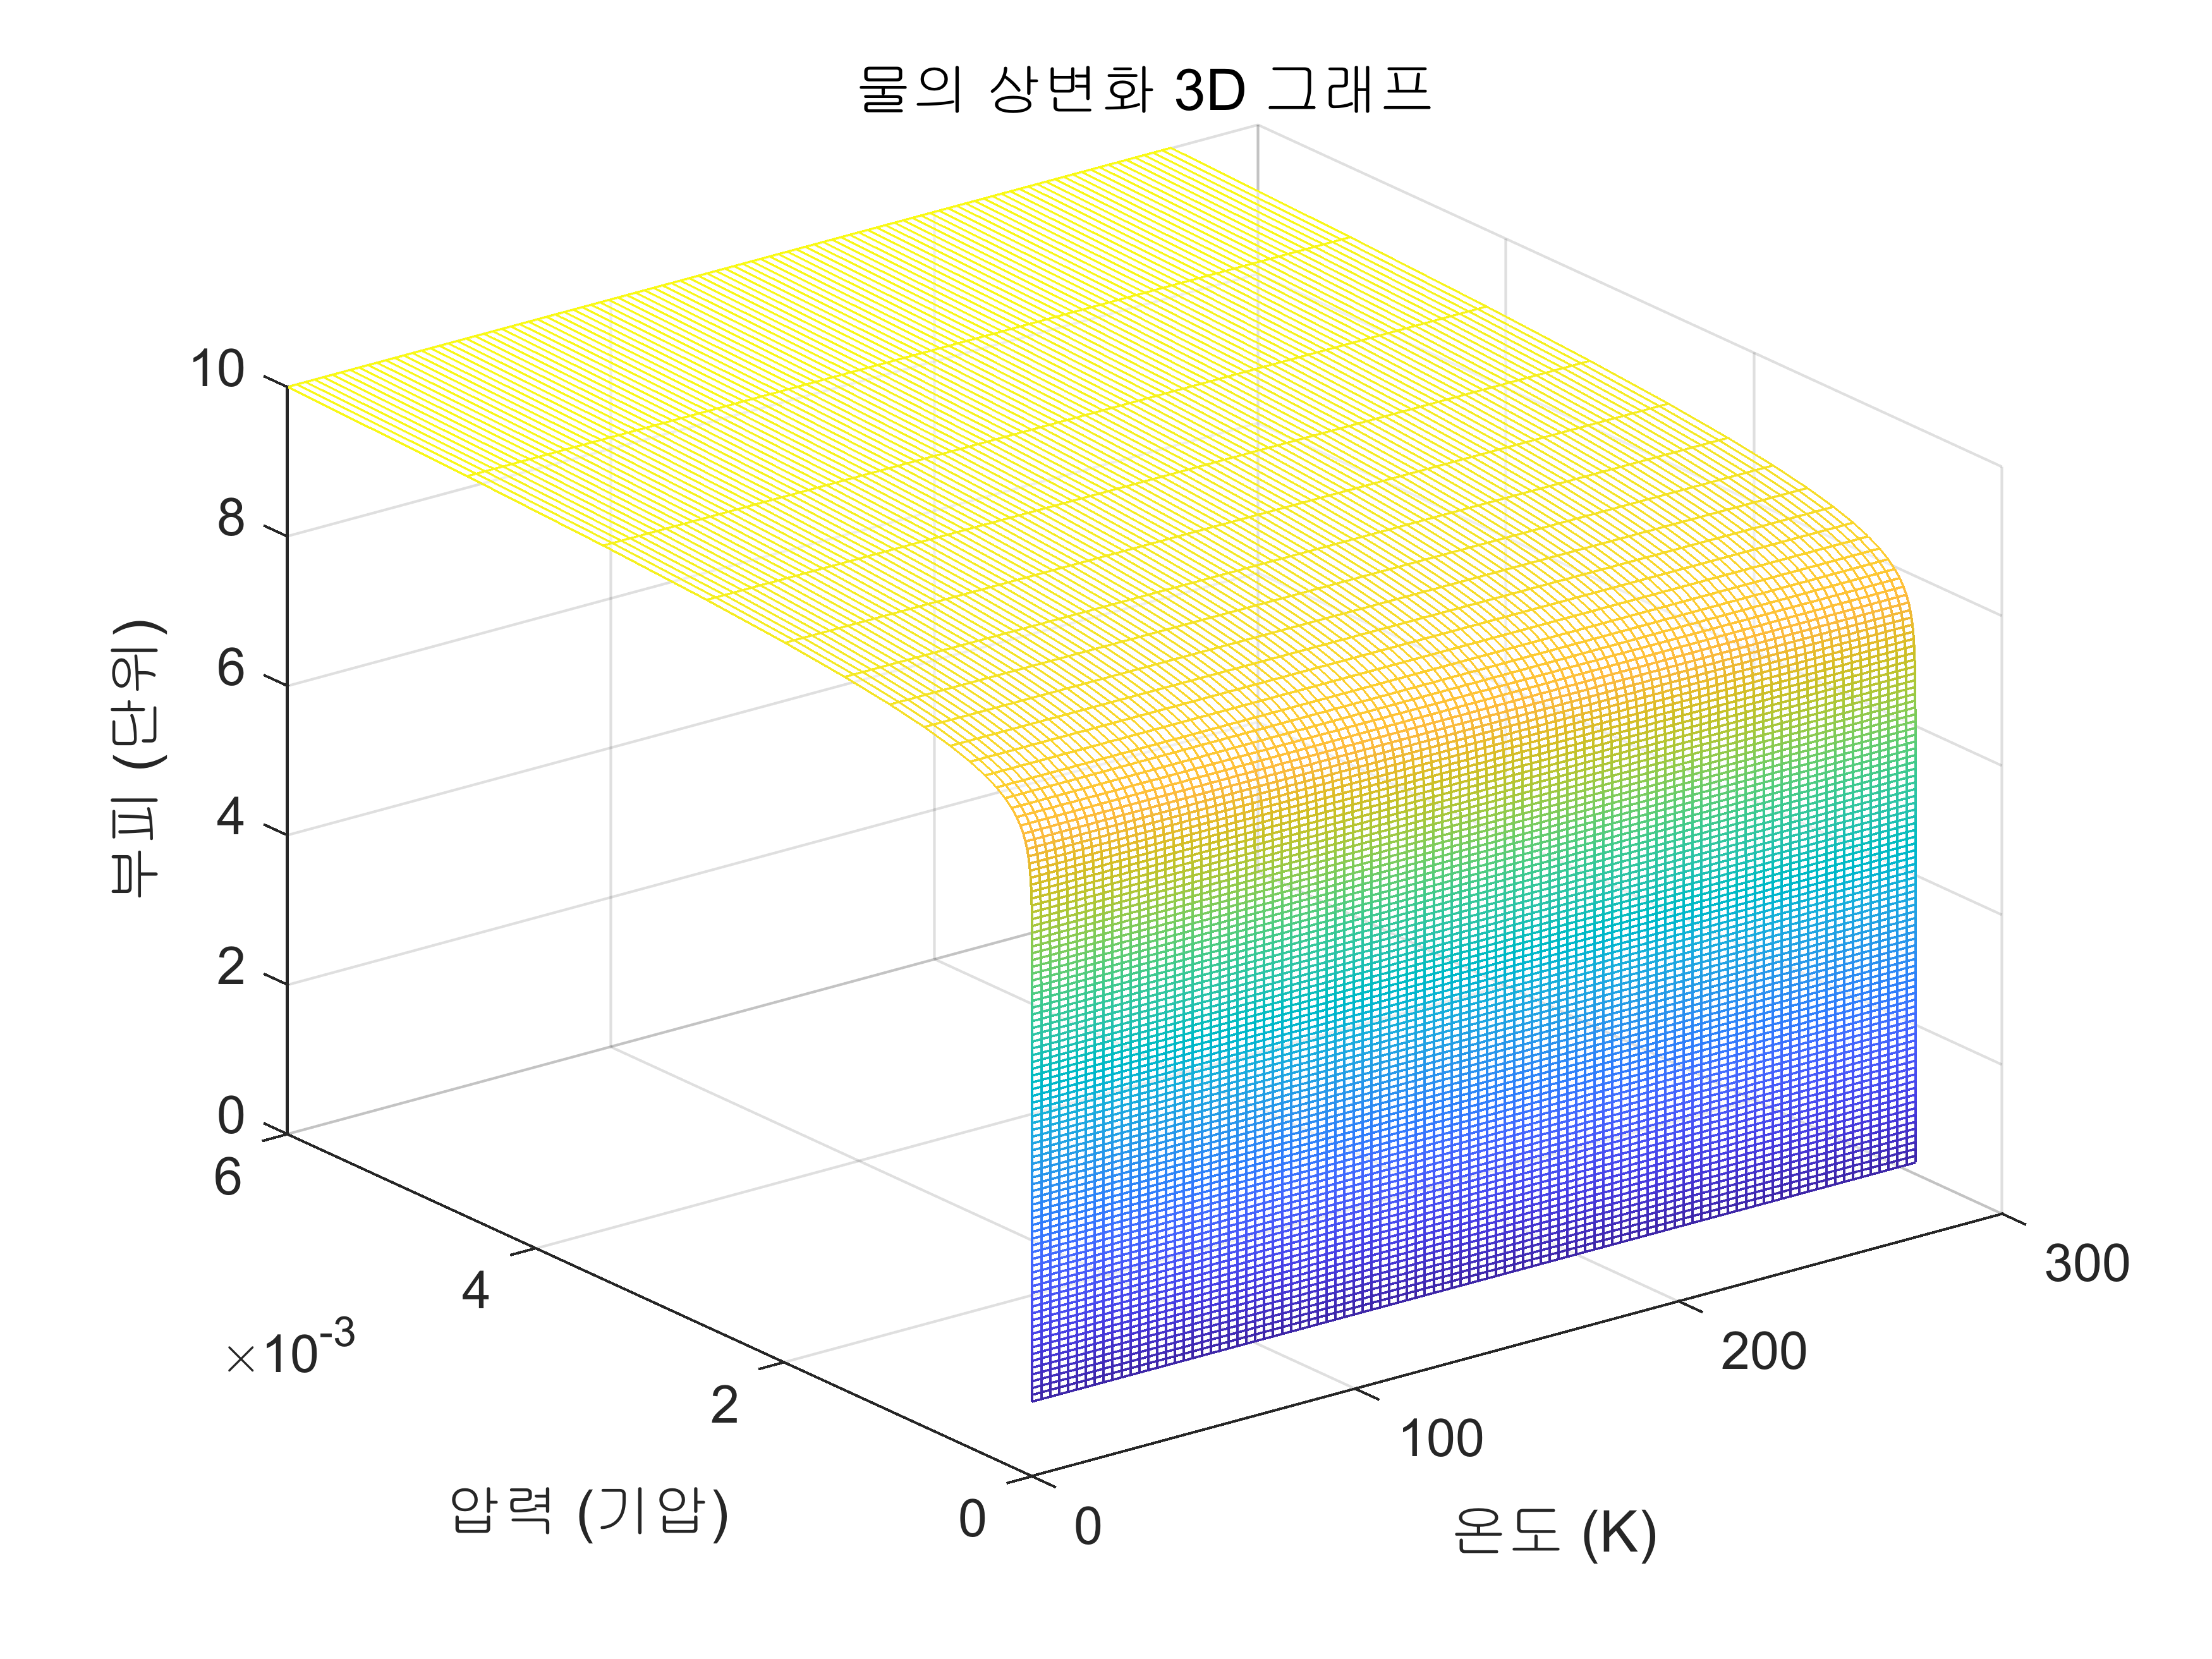

In [2]:
% 온도 범위 설정 (K)
T = linspace(0.1, 273.16, 100); % 절대 영도에서 삼중점까지

% 상태 방정식 간단한 모델 (고체-액체, 액체-기체, 고체-기체)
P_solid_liquid = @(T) 0.006 * exp(0.1 * (T - 273.16)); % 임의 모델
P_liquid_gas = @(T) 0.006 + 0.01 * (T - 273.16); % 임의 모델
P_solid_gas = @(T) 0.006 * exp(0.05 * (T - 273.16)); % 임의 모델

% 부피 데이터 (임의로 설정)
V = linspace(1, 10, 100);

% 압력 계산
[P_mesh, T_mesh] = meshgrid(P_solid_liquid(T), T);
V_mesh = repmat(V, length(T), 1);

% 3D 그래프 그리기
figure;
hold on;
mesh(T_mesh, P_mesh, V_mesh, 'FaceAlpha', 0.5);
xlabel('온도 (K)');
ylabel('압력 (기압)');
zlabel('부피 (단위)');
title('물의 상변화 3D 그래프');
grid on;
view(3);
hold off;


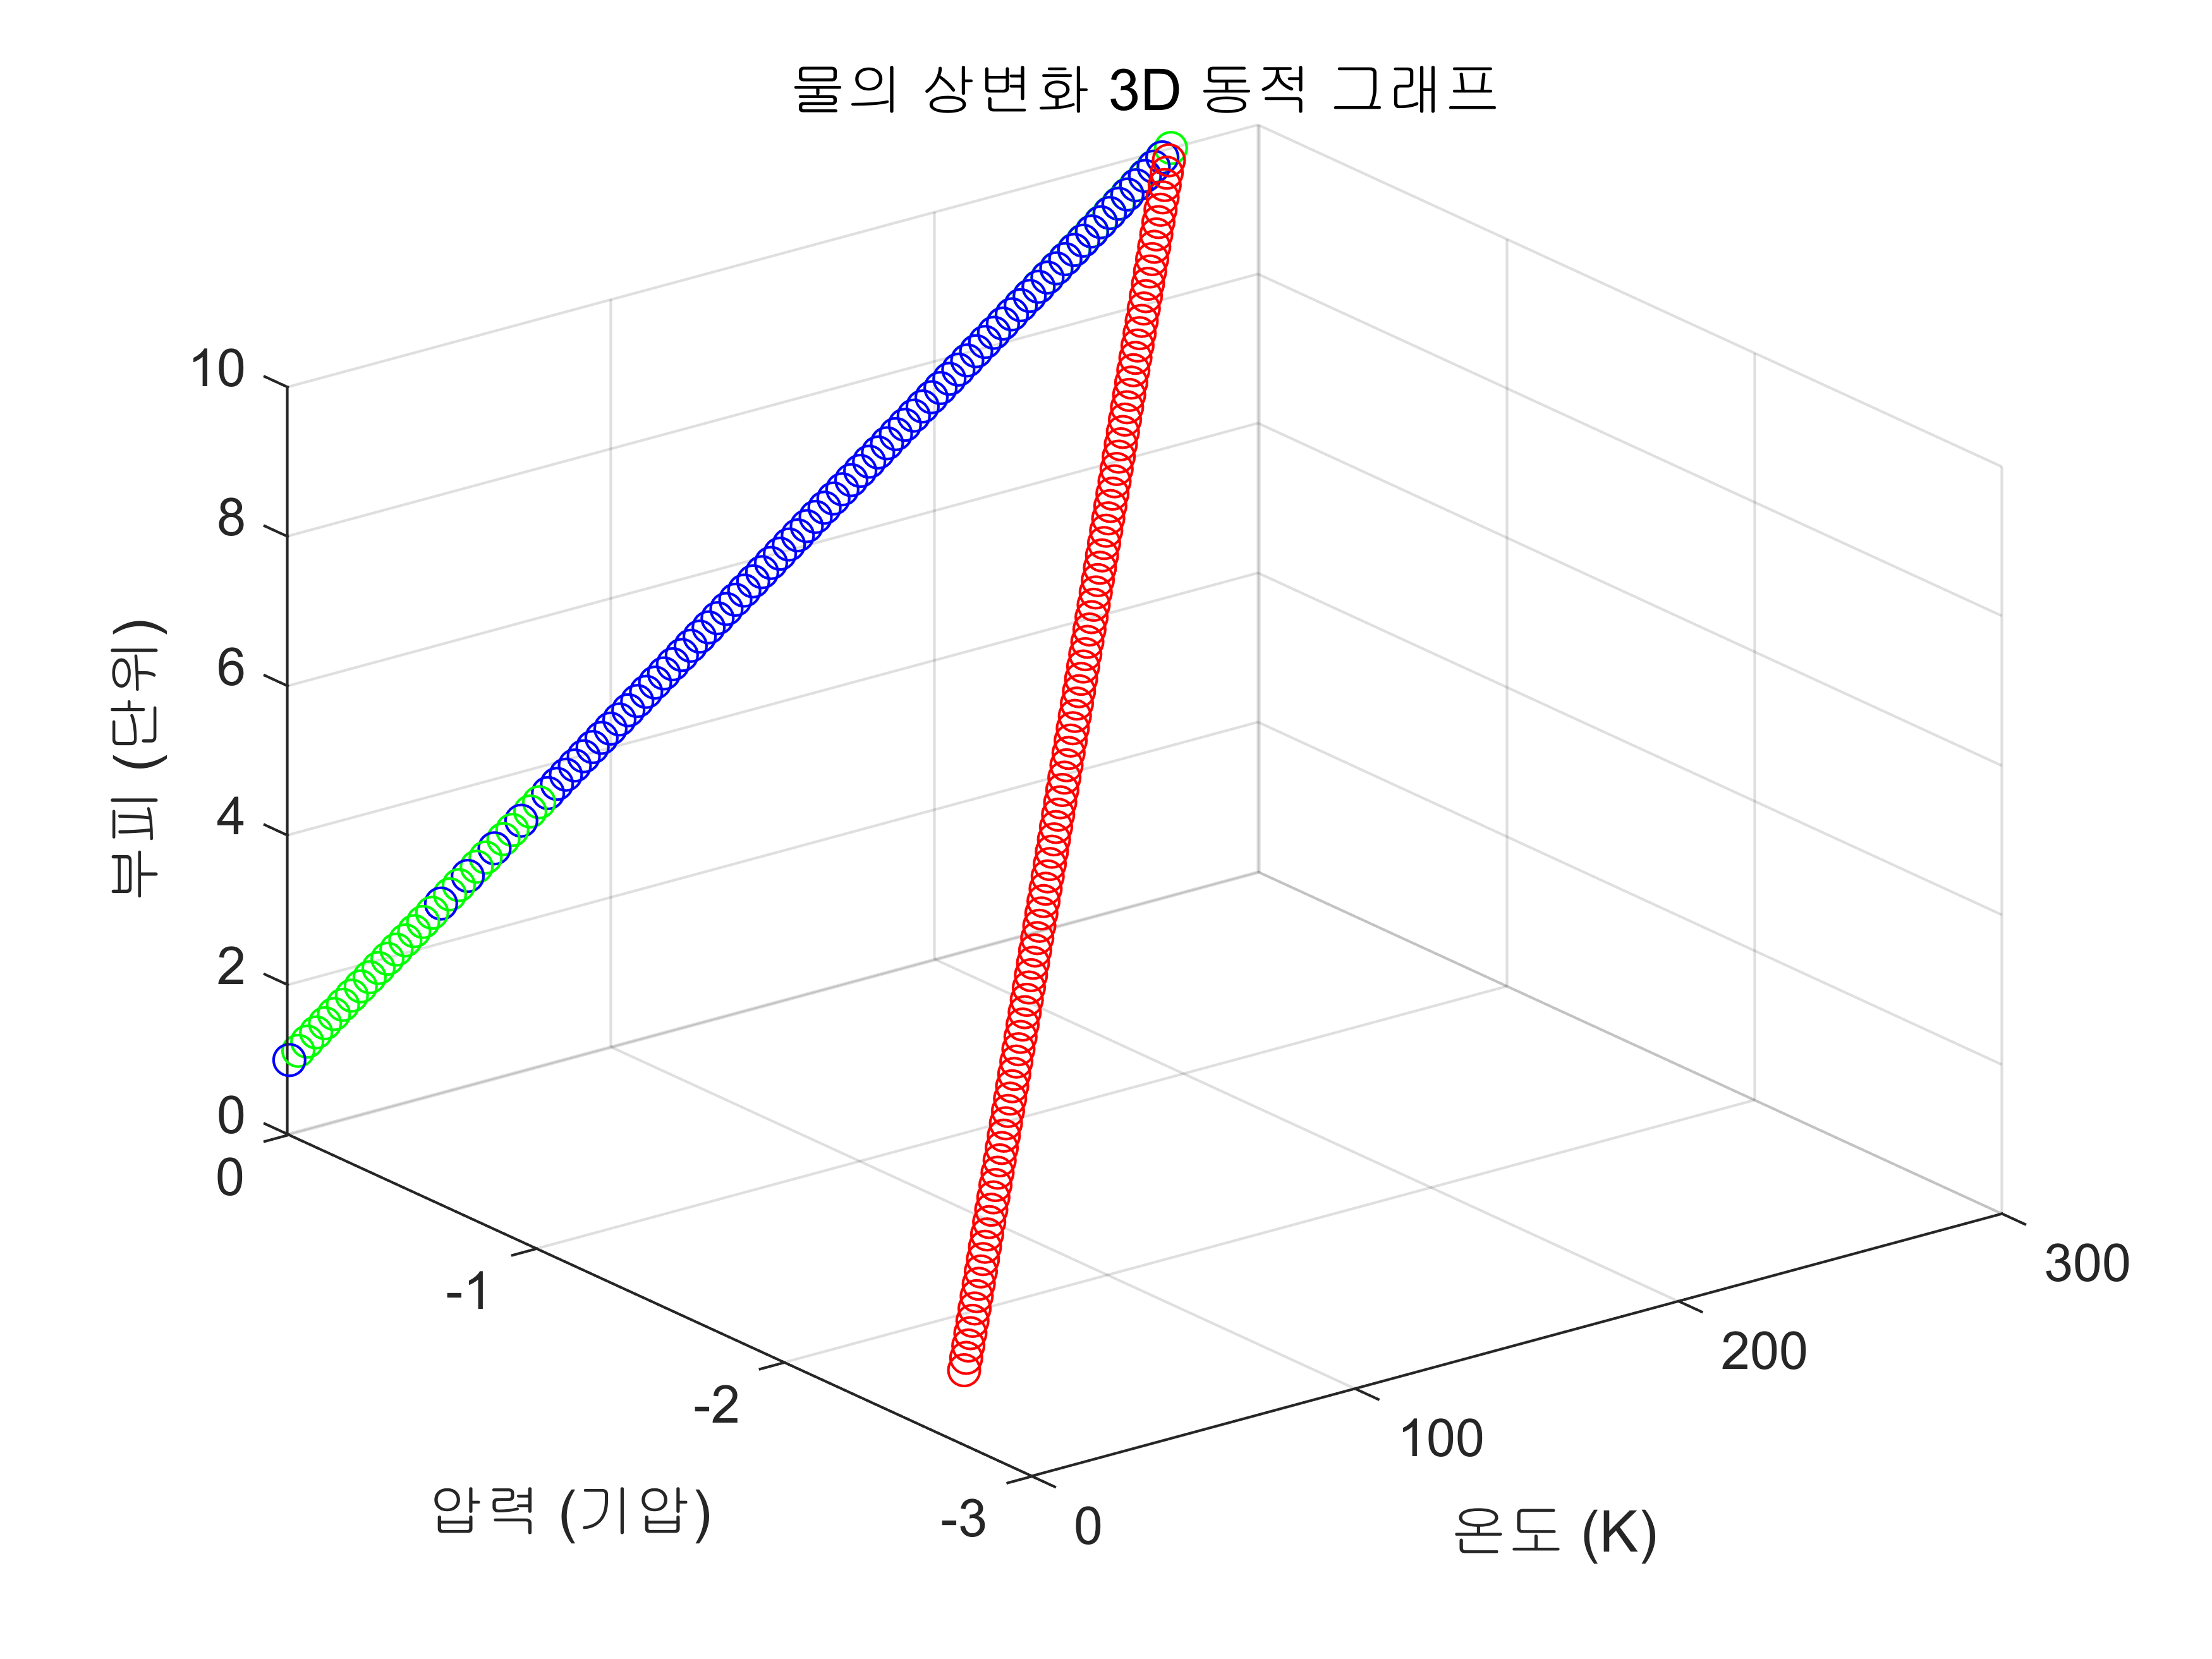

In [3]:
% 온도 범위 설정 (K)
T = linspace(0.1, 273.16, 100); % 절대 영도에서 삼중점까지

% 상태 방정식 간단한 모델 (고체-액체, 액체-기체, 고체-기체)
P_solid_liquid = @(T) 0.006 * exp(0.1 * (T - 273.16)); % 임의 모델
P_liquid_gas = @(T) 0.006 + 0.01 * (T - 273.16); % 임의 모델
P_solid_gas = @(T) 0.006 * exp(0.05 * (T - 273.16)); % 임의 모델

% 부피 데이터 (임의로 설정)
V = linspace(1, 10, 100);

% 3D 그래프 그리기
figure;
hold on;
xlabel('온도 (K)');
ylabel('압력 (기압)');
zlabel('부피 (단위)');
title('물의 상변화 3D 동적 그래프');
grid on;
view(3);

for i = 1:length(T)
    % 현재 온도에 따른 압력 계산
    T_current = T(i);
    P_current_solid_liquid = P_solid_liquid(T_current);
    P_current_liquid_gas = P_liquid_gas(T_current);
    P_current_solid_gas = P_solid_gas(T_current);

    % 3D 플롯 업데이트
    plot3(T_current, P_current_solid_liquid, V(i), 'bo'); % 고체-액체
    plot3(T_current, P_current_liquid_gas, V(i), 'ro'); % 액체-기체
    plot3(T_current, P_current_solid_gas, V(i), 'go'); % 고체-기체

    % 잠시 멈춤
    pause(0.1);
end

hold off;

-  베르누이 방정식: $p+\frac{1}{2}\rho v^2 +\rho gz=C$
-  이 방정식의 모든 항은 '압력'의 차원을 가지고 있습니다.
-  압력 p의 차원: $[M/LT^2 ]$
-  동압 $\frac{1}{2}\rho v^2$ 의 차원: $[M/LT^2 ]$
-  위치 에너지 $\rho gz$ 의 차원: $[M/LT^2 ]$

In [4]:
% 베르누이 방정식의 각 항의 차원 분석

% 압력 (p) 차원
syms M L T
p_dimension = M / (L * T^2);
disp('압력 p의 차원:');

압력 p의 차원:

In [5]:
disp(p_dimension);

In [6]:

% 동압 (1/2 * rho * v^2) 차원
rho = M / L^3;  % 밀도 (rho)의 차원
v = L / T;      % 속도 (v)의 차원
dynamic_pressure_dimension = rho * v^2;
disp('동압 1/2 * rho * v^2의 차원:');

동압 1/2 * rho * v^2의 차원:

In [7]:
disp(dynamic_pressure_dimension);

In [8]:

% 위치 에너지 (rho * g * z) 차원
g = L / T^2;    % 중력 가속도 (g)의 차원
z = L;          % 높이 (z)의 차원
potential_energy_dimension = rho * g * z;
disp('위치 에너지 rho * g * z의 차원:');

위치 에너지 rho * g * z의 차원:

In [9]:
disp(potential_energy_dimension);


**파이프 내의 유속 변화**:

-  파이프의 단면적이 좁아지면서 유속이 빨라지는 상황.
-  유속의 변화에 따른 압력과 위치 에너지의 변화를 보여줄 수 있습니다.


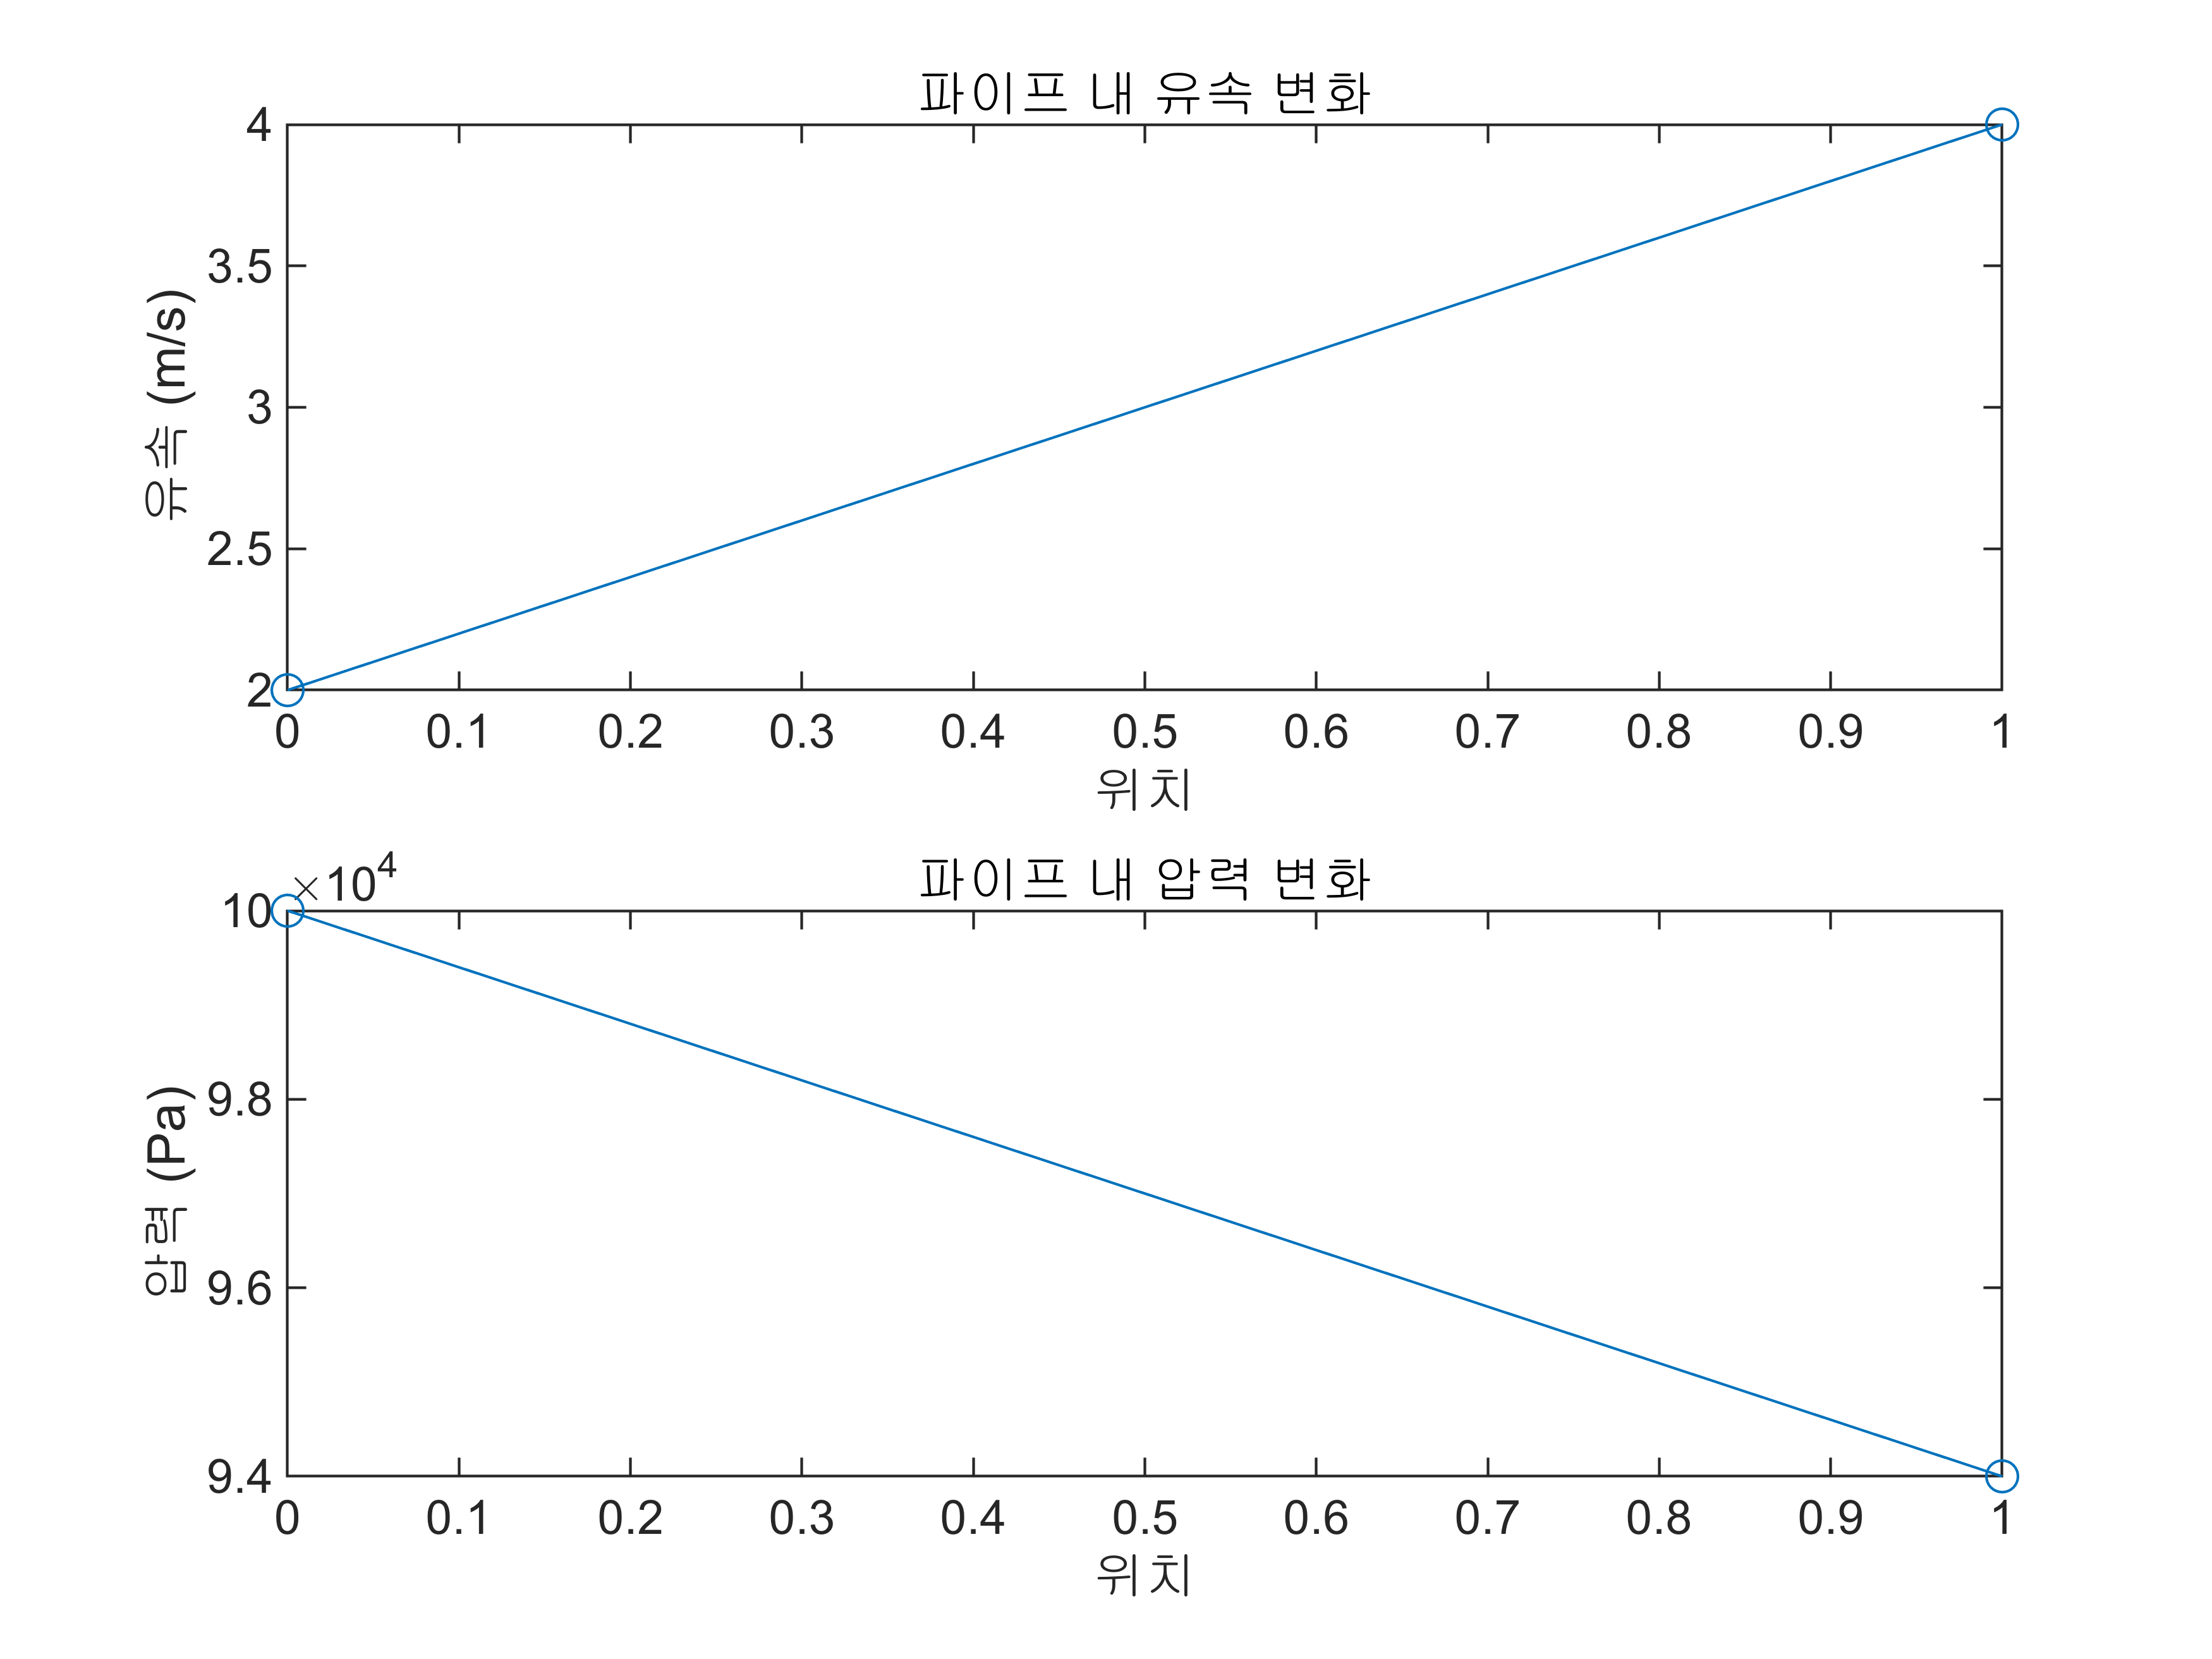

In [10]:
% 베르누이 방정식 시각화
% 파이프 내에서 유속이 변할 때의 압력, 속도, 위치 에너지 변화

% 파이프의 단면적 변화 (좁은 부분과 넓은 부분)
A1 = 0.1; % 넓은 부분의 단면적 (m^2)
A2 = 0.05; % 좁은 부분의 단면적 (m^2)

% 밀도 (물의 밀도 가정)
rho = 1000; % (kg/m^3)

% 유속 변화 (연속 방정식 적용: A1 * v1 = A2 * v2)
v1 = 2; % 넓은 부분에서의 유속 (m/s)
v2 = (A1 * v1) / A2; % 좁은 부분에서의 유속 (m/s)

% 베르누이 방정식에 따른 압력 변화 계산 (높이 변화는 없다고 가정)
% p1 + 0.5 * rho * v1^2 = p2 + 0.5 * rho * v2^2
syms p1 p2
bernoulli_eq = p1 + 0.5 * rho * v1^2 == p2 + 0.5 * rho * v2^2;
p2 = solve(bernoulli_eq, p2);

% 숫자 계산
p1_val = 100000; % 임의의 초기 압력 (Pa)
p2_val = double(subs(p2, p1, p1_val));

% 시각화
x = [0 1]; % 위치 (0: 넓은 부분, 1: 좁은 부분)
v = [v1 v2]; % 유속
p = [p1_val p2_val]; % 압력

figure;
subplot(2,1,1);
plot(x, v, '-o');
xlabel('위치');
ylabel('유속 (m/s)');
title('파이프 내 유속 변화');

subplot(2,1,2);
plot(x, p, '-o');
xlabel('위치');
ylabel('압력 (Pa)');
title('파이프 내 압력 변화');


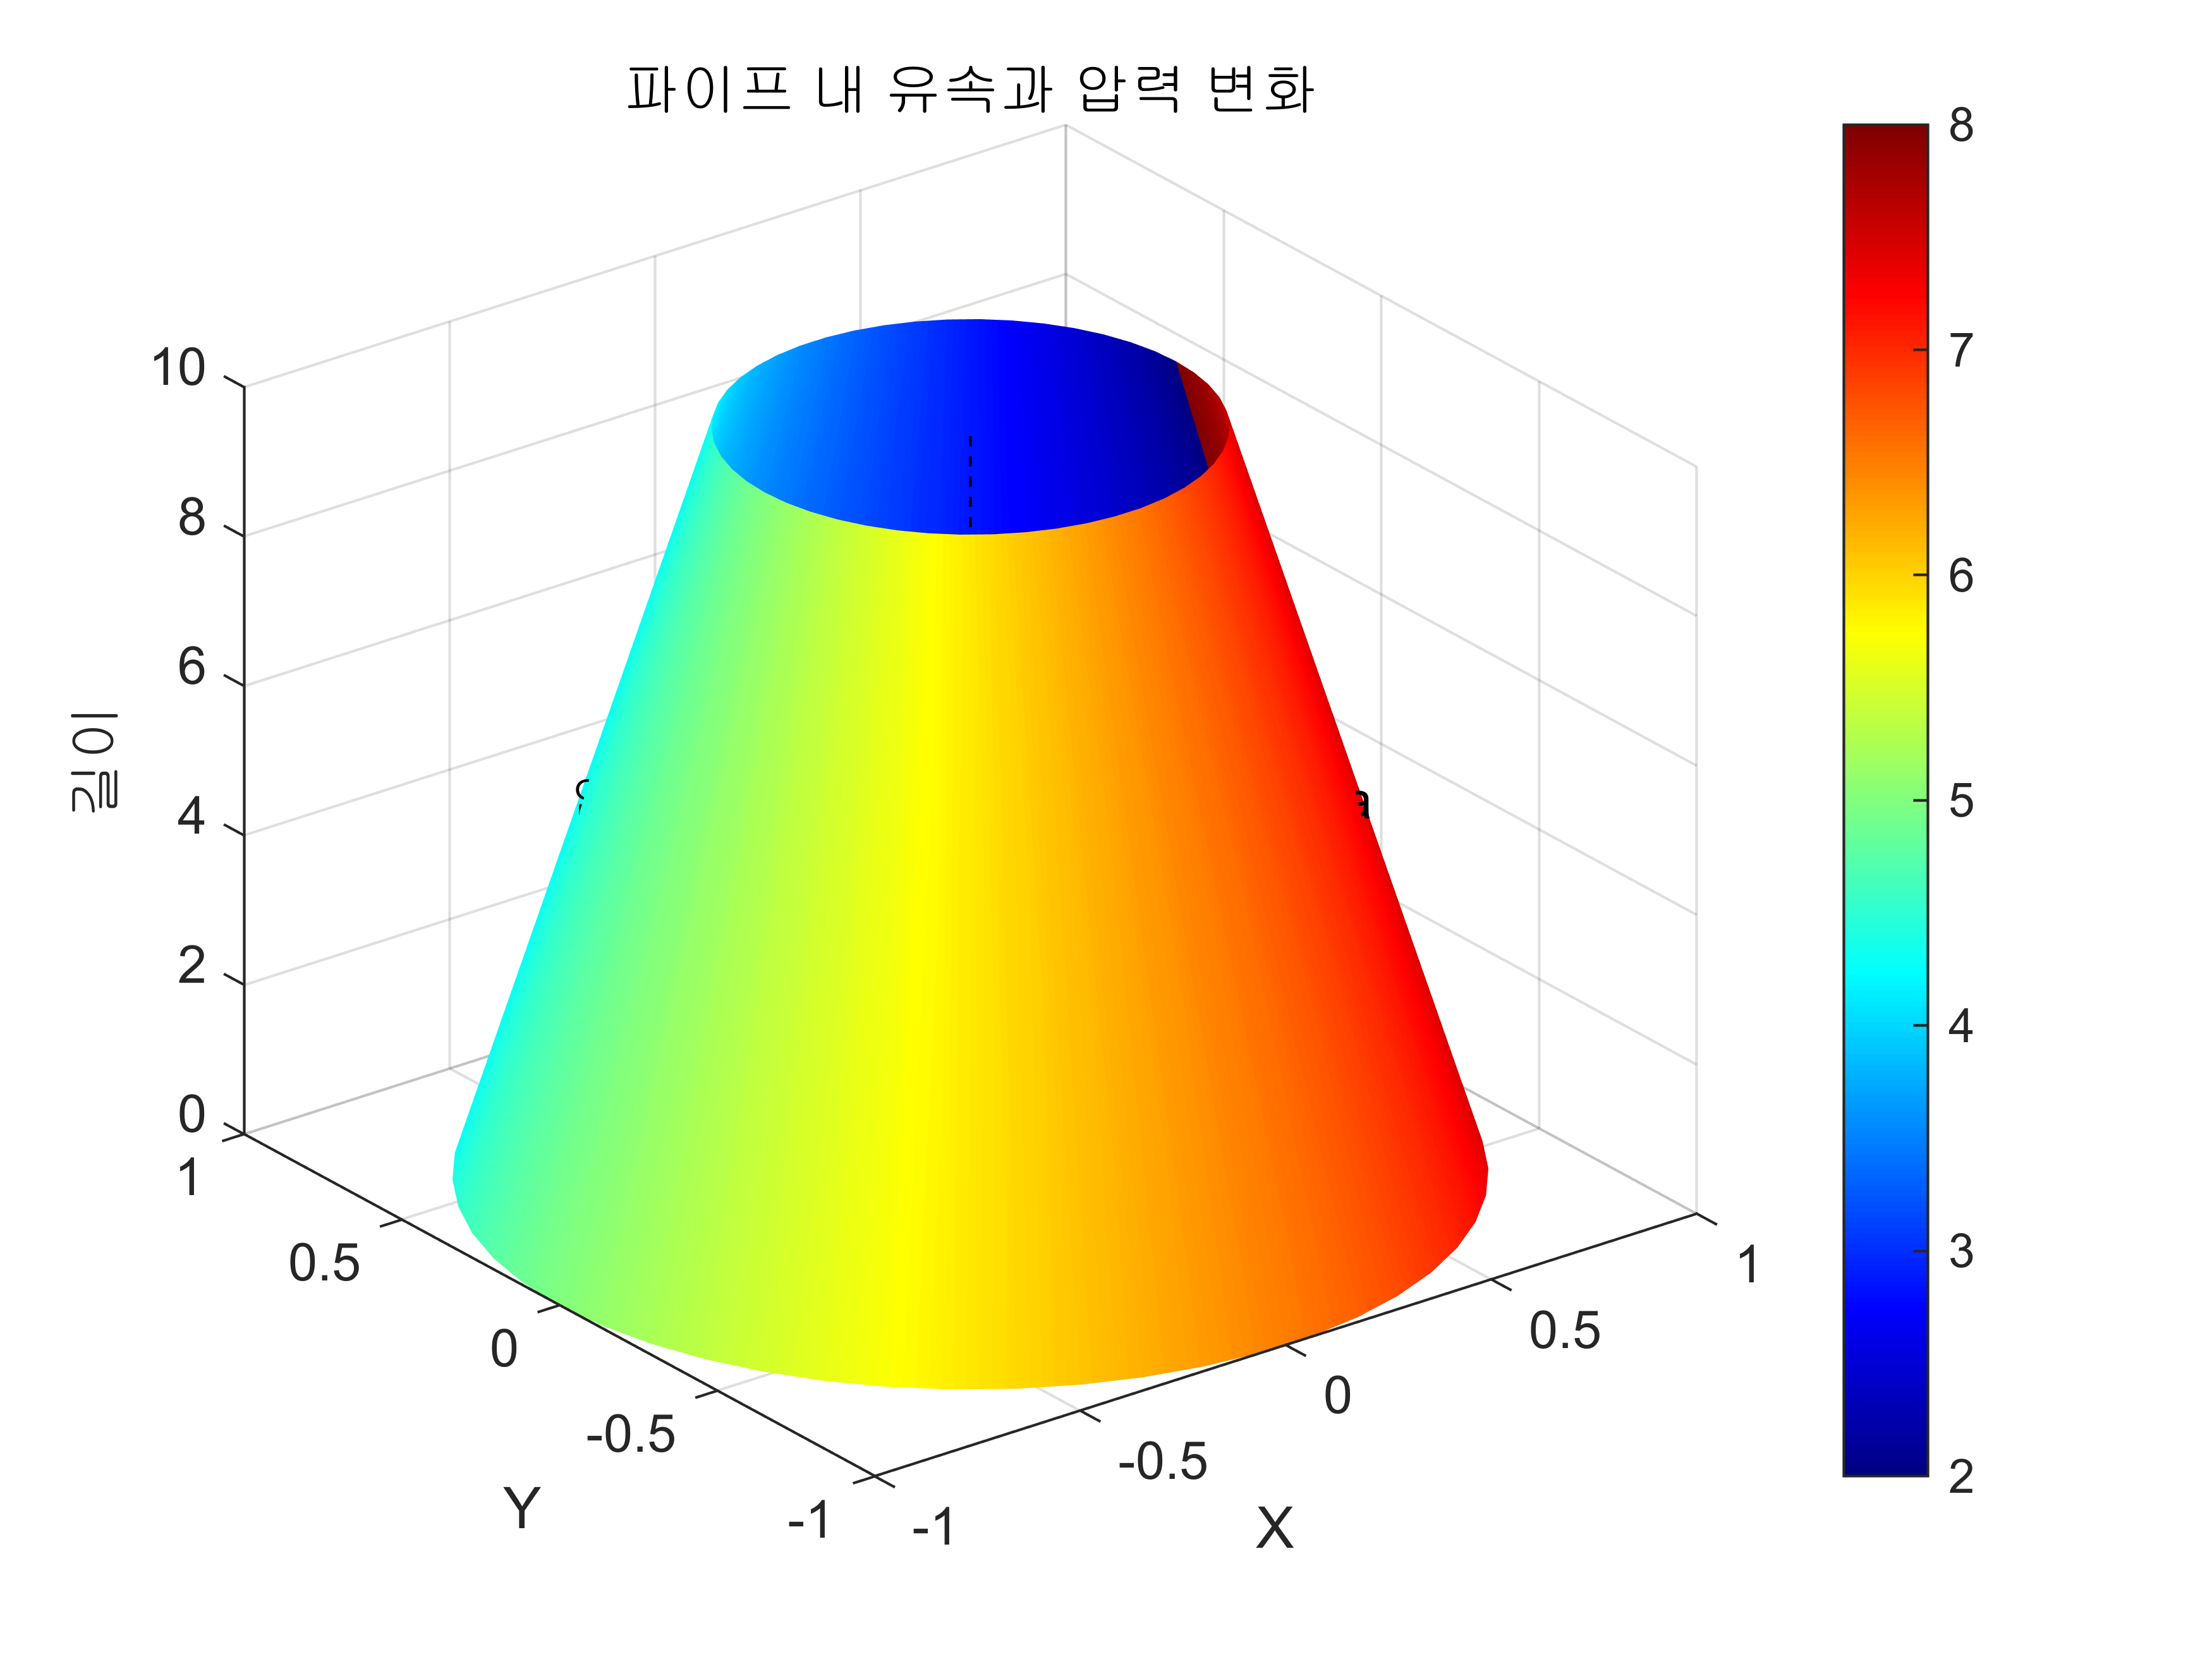

In [11]:
% 베르누이 방정식의 3D 시각화
% 파이프 내에서 유속과 압력의 변화

% 파이프의 길이와 반지름 설정
length_pipe = 10; % 파이프의 길이
radius1 = 1; % 파이프 넓은 부분의 반지름
radius2 = 0.5; % 파이프 좁은 부분의 반지름

% 파이프의 단면적 변화
A1 = pi * radius1^2;
A2 = pi * radius2^2;

% 유속 변화
v1 = 2; % 넓은 부분에서의 유속 (m/s)
v2 = (A1 * v1) / A2; % 좁은 부분에서의 유속 (m/s)

% 압력 변화 계산 (베르누이 방정식, 높이 변화 없음 가정)
rho = 1000; % 유체의 밀도 (물의 밀도 가정, kg/m^3)
syms p1 p2
bernoulli_eq = p1 + 0.5 * rho * v1^2 == p2 + 0.5 * rho * v2^2;
p1_val = 100000; % 임의의 초기 압력 (Pa)
p2_val = double(subs(solve(bernoulli_eq, p2), p1, p1_val));

% 3D 시각화
[x, y, z] = cylinder([radius1, radius2], 50); % 파이프의 모양
z = z * length_pipe; % 파이프의 길이 적용

% 유속과 압력을 색상으로 표시하기 위한 데이터
velocity = linspace(v1, v2, size(z, 2));
pressure = linspace(p1_val, p2_val, size(z, 2));
color_data = repmat(velocity, size(x, 1), 1); % 유속을 색상으로 사용

% 3D 플롯
figure;
surf(x, y, z, color_data, 'EdgeColor', 'none');
colormap(jet);
colorbar;
title('파이프 내 유속과 압력 변화');
xlabel('X');
ylabel('Y');
zlabel('길이');
shading interp;

% 파이프를 따라 압력 변화 추가 표시
hold on;
plot3(zeros(1, size(z, 2)), zeros(1, size(z, 2)), linspace(0, length_pipe, size(z, 2)), 'k--');
text(0, 0, length_pipe/2, sprintf('압력 변화: %d Pa to %d Pa', p1_val, p2_val), 'HorizontalAlignment', 'center');

-  파이프의 길이와 반지름을 설정하고, 넓은 부분에서 좁은 부분으로의 변화를 나타냅니다.
-  베르누이 방정식을 사용하여 유속과 압력 변화를 계산합니다.
-  <samp>surf</samp> 함수를 이용하여 파이프의 3D 모양을 그린 후, 유속 변화를 색상으로 표현합니다.
-  파이프를 따라 압력 변화를 표시하여 유속과 압력의 관계를 시각화합니다.

**버킹엄 파이 정리(Buckingham π Theorem)**: n개의 변수와 k개의 기본 차원이 주어졌을 때, 무차원 수의 개수는 n \- k로 나타낼 수 있습니다.

-  예를 들어, 유체의 흐름에서 중요한 변수인 속도 v, 길이 L, 밀도 ρ, 점성계수 μ를 고려하면 이들은 차원 \[M\] (질량), \[L\] (길이), \[T\] (시간)으로 표현됩니다.
-  버킹엄 파이 정리에 따르면 무차원 수의 개수는 n \- k = 4 \- 3 = 1로, 이를 통해 레이놀즈 수(Reynolds Number)를 도출할 수 있습니다.


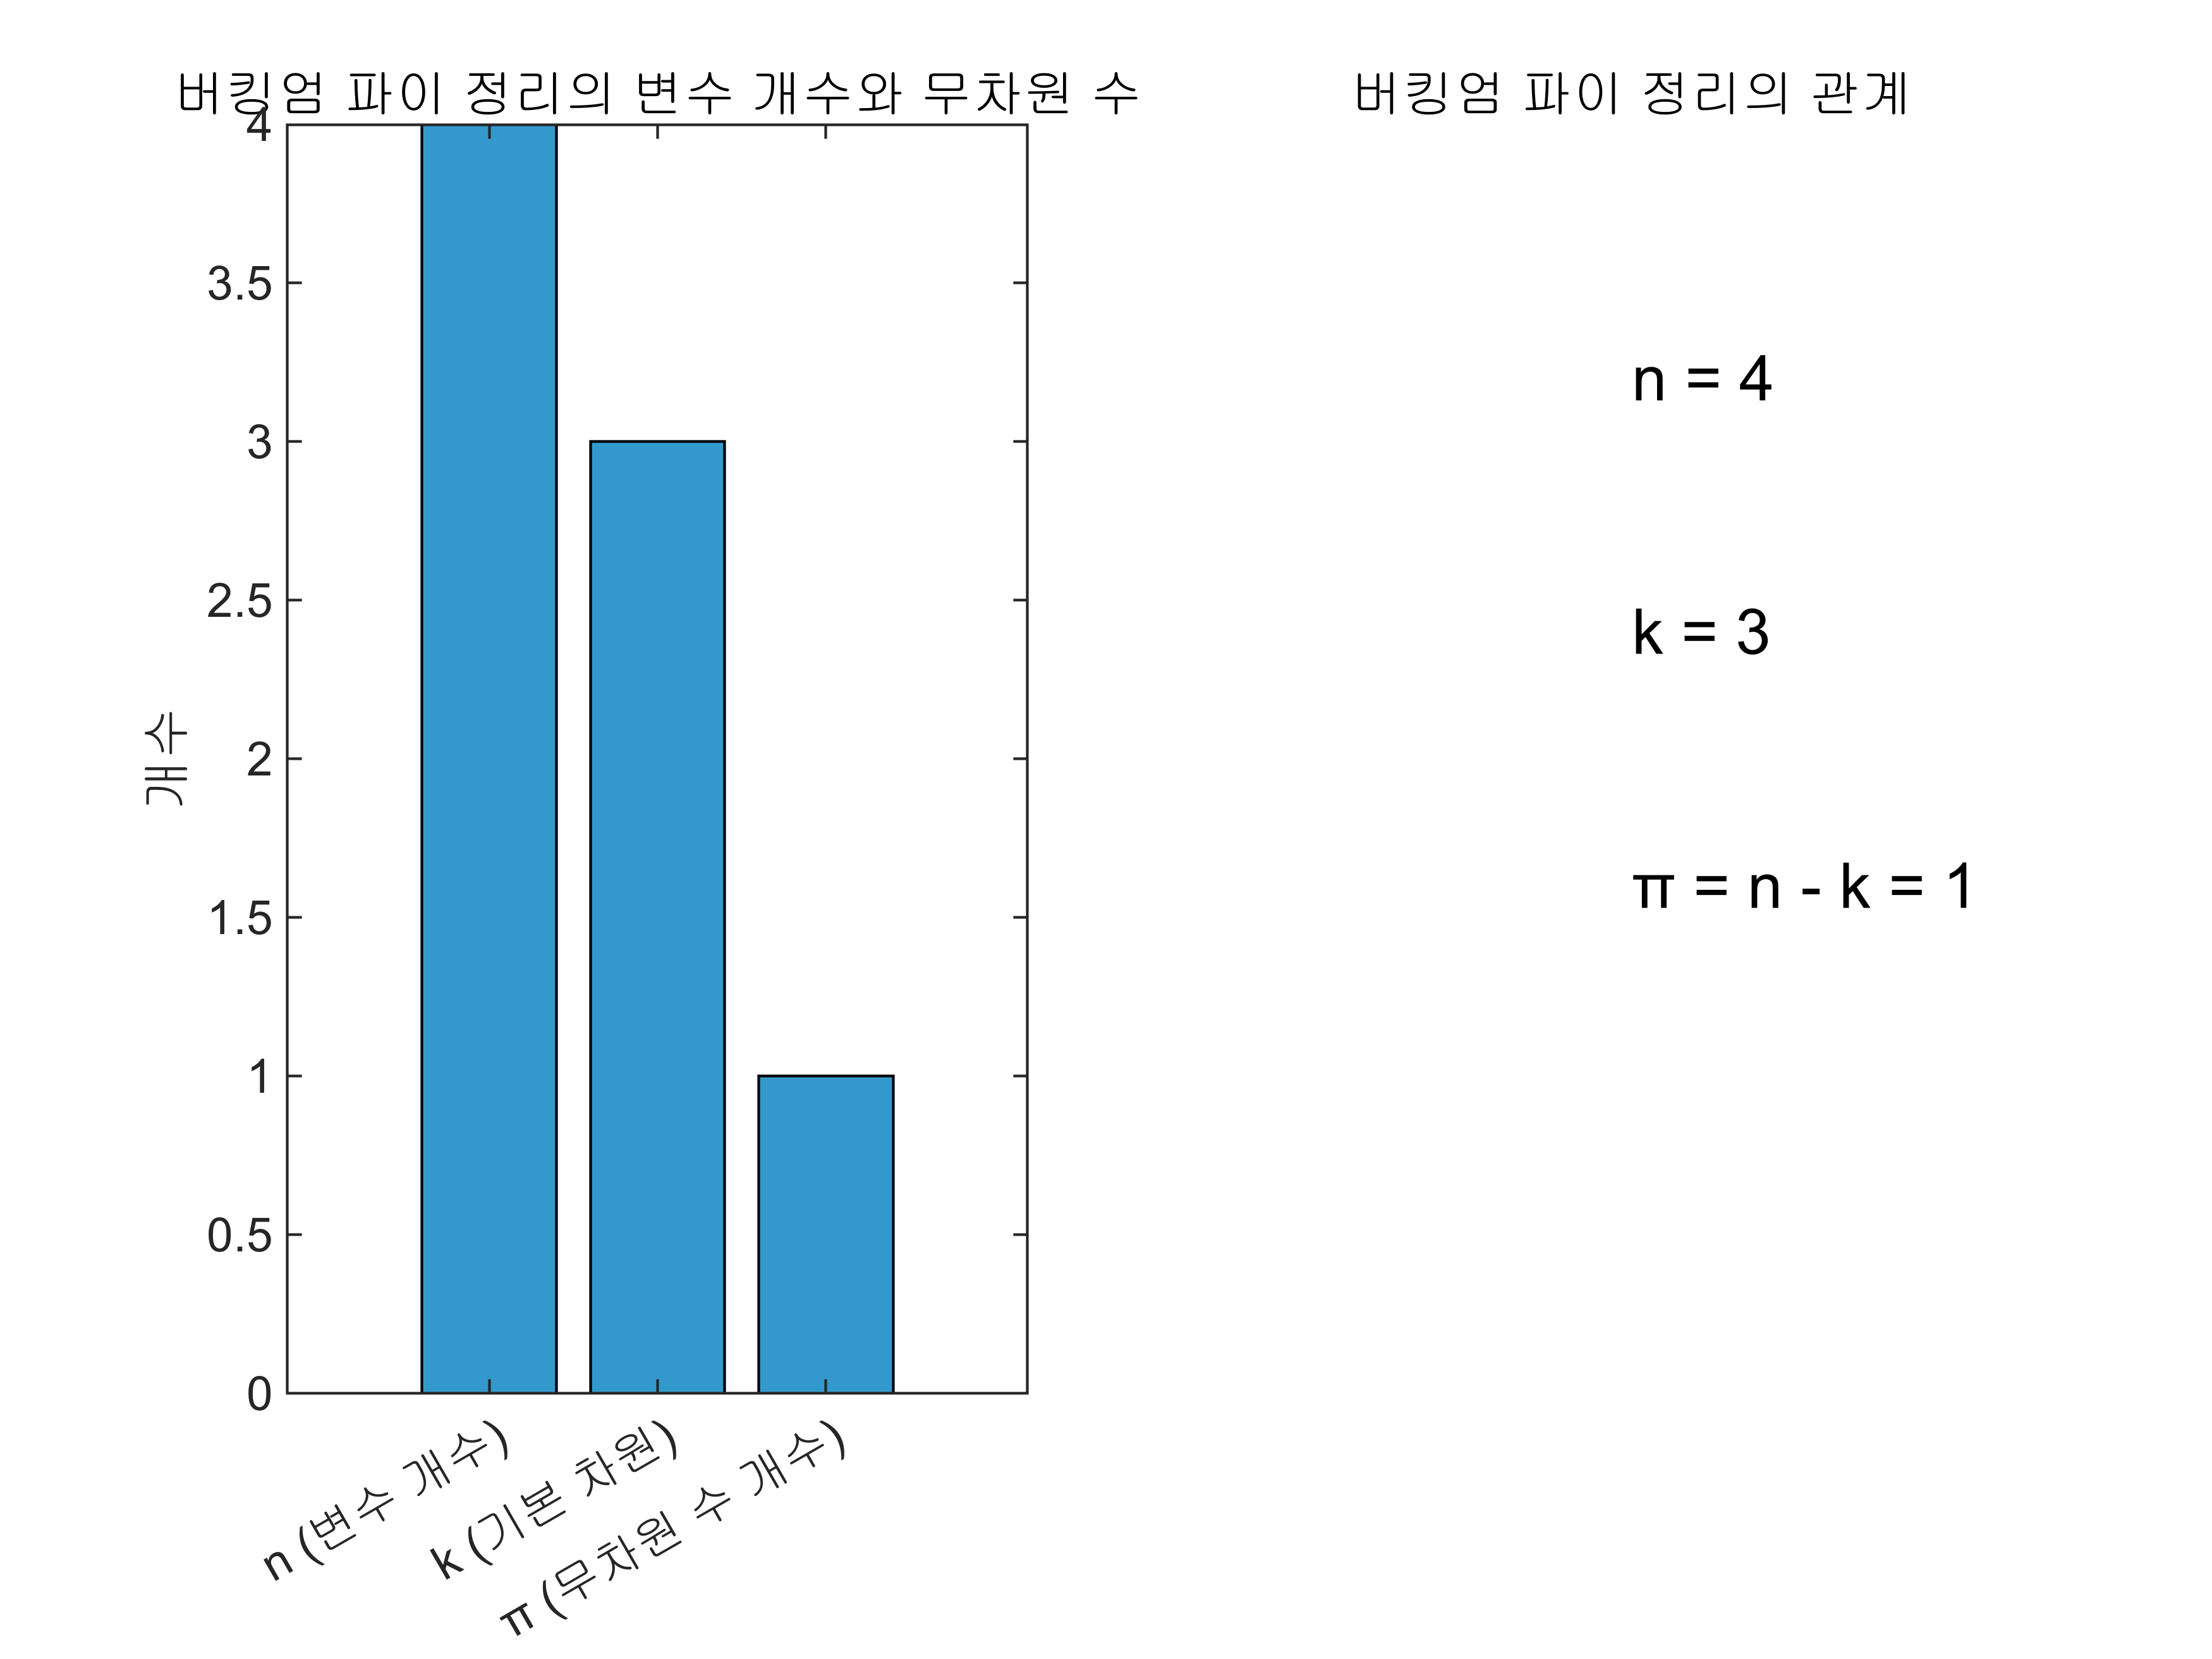

In [12]:
% 버킹엄 파이 정리 시각화

% 변수의 개수 (n)와 기본 차원의 개수 (k)
n = 4; % 속도 v, 길이 L, 밀도 ρ, 점성계수 μ
k = 3; % 기본 차원 [M], [L], [T]

% 무차원 수의 개수
num_dimless = n - k;

% 시각화
figure;
subplot(1, 2, 1);
bar([n, k, num_dimless], 'FaceColor', [0.2 0.6 0.8]);
set(gca, 'XTickLabel', {'n (변수 개수)', 'k (기본 차원)', 'π (무차원 수 개수)'});
ylabel('개수');
title('버킹엄 파이 정리의 변수 개수와 무차원 수');

% 변수와 무차원 수의 관계
subplot(1, 2, 2);
text(0.5, 0.8, ['n = ' num2str(n)], 'FontSize', 12);
text(0.5, 0.6, ['k = ' num2str(k)], 'FontSize', 12);
text(0.5, 0.4, ['π = n - k = ' num2str(num_dimless)], 'FontSize', 12);
axis off;
title('버킹엄 파이 정리의 관계');

#### **상사이론 (Theory of Similarity)****이론**
-  **정의**: 상사이론은 서로 다른 시스템이나 실험 모델 간의 유사성을 분석하고 비교하는 방법을 제공합니다.
-  **목적**: 물리적 시스템을 축소 또는 확대하여 모델링할 때, 원래 시스템과 모델 사이의 유사성을 유지하기 위해 상사이론을 사용합니다.
-  **원리**:
-  **기하학적 상사**: 모델과 실제 시스템 간의 모든 길이 비율이 동일해야 합니다.
-  **동력학적 상사**: 모델과 실제 시스템에서 힘의 비율이 동일해야 합니다.
-  **운동학적 상사**: 모델과 실제 시스템에서 속도 및 가속도 등 운동 특성의 비율이 동일해야 합니다.

**수식**

-  상사이론의 핵심은 무차원 수를 사용하여 두 시스템이 상사한지 여부를 확인하는 것입니다.
-  예를 들어, 유체 역학에서 두 흐름이 상사하려면 다음과 같은 무차원 수가 일치해야 합니다:
-  **레이놀즈 수 (R****e****)**: 관성력과 점성력의 비.
-  **프루드 수 (F****r****)**: 관성력과 중력의 비.
-  **웨버 수 (W****e****)**: 관성력과 표면장력의 비.
-  이러한 무차원 수가 동일하면 두 시스템은 상사한 것으로 간주할 수 있습니다.
#### **항공기 날개 주위의 유체 흐름 분석****문제 설정**
-  항공기 날개 주변의 유체 흐름을 분석하고자 합니다.
-  직접 항공기에 실험을 수행하는 것은 비용이 높고 위험할 수 있으므로, 축소된 모형을 사용하여 실험실에서 실험을 진행하려고 합니다.
-  이때, 모형 실험에서 얻은 결과를 실제 항공기에 적용하려면 상사이론을 활용하여 두 시스템이 동력학적으로 유사한지 확인해야 합니다.

**버킹엄 파이 정리 적용**

1.  **식별해야 할 변수들**:

-  유체의 밀도 (ρ) \[ $M/L^3$ \]
-  유체의 속도 (v) \[ $L/T$ \]
-  날개의 특징 길이 (L) \[L\]
-  유체의 점성계수 (μ) \[ $M/LT$ \]
-  날개에 작용하는 힘 (F) \[ $M\cdot L/T^2$ \]

1.  **기본 차원**:

-  이 시스템에서 기본 차원은 세 가지입니다: 질량 (M), 길이 (L), 시간 (T).
-  총 변수의 수 (n) = 5
-  기본 차원의 수 (k) = 3
-  따라서, 무차원 수의 개수 ( $n-k$ ) = 2

1.  **무차원 수 도출**:

-  버킹엄 파이 정리를 사용하여 2개의 무차원 수를 도출합니다.
-  이 경우 대표적인 무차원 수는 **레이놀즈 수** (Re)와 **항력계수** ( $C_D$ ​)입니다.
-  **레이놀즈 수 (R****e****)**: $Re=\frac{\rho vL}{\mu }$ ​
-  유체의 관성력과 점성력의 비율을 나타내는 무차원 수입니다.
-  날개 주변 유체 흐름의 상태를 판단하는 데 중요한 지표로 사용됩니다.
-  **항력계수 (** $C_D$ **)**: $C_D =\frac{F}{0.5\rho v^2 A}$ ​
-  날개에 작용하는 항력을 나타내는 무차원 수로, 유체 역학에서 물체의 형상과 흐름 특성에 대한 정보를 제공합니다.



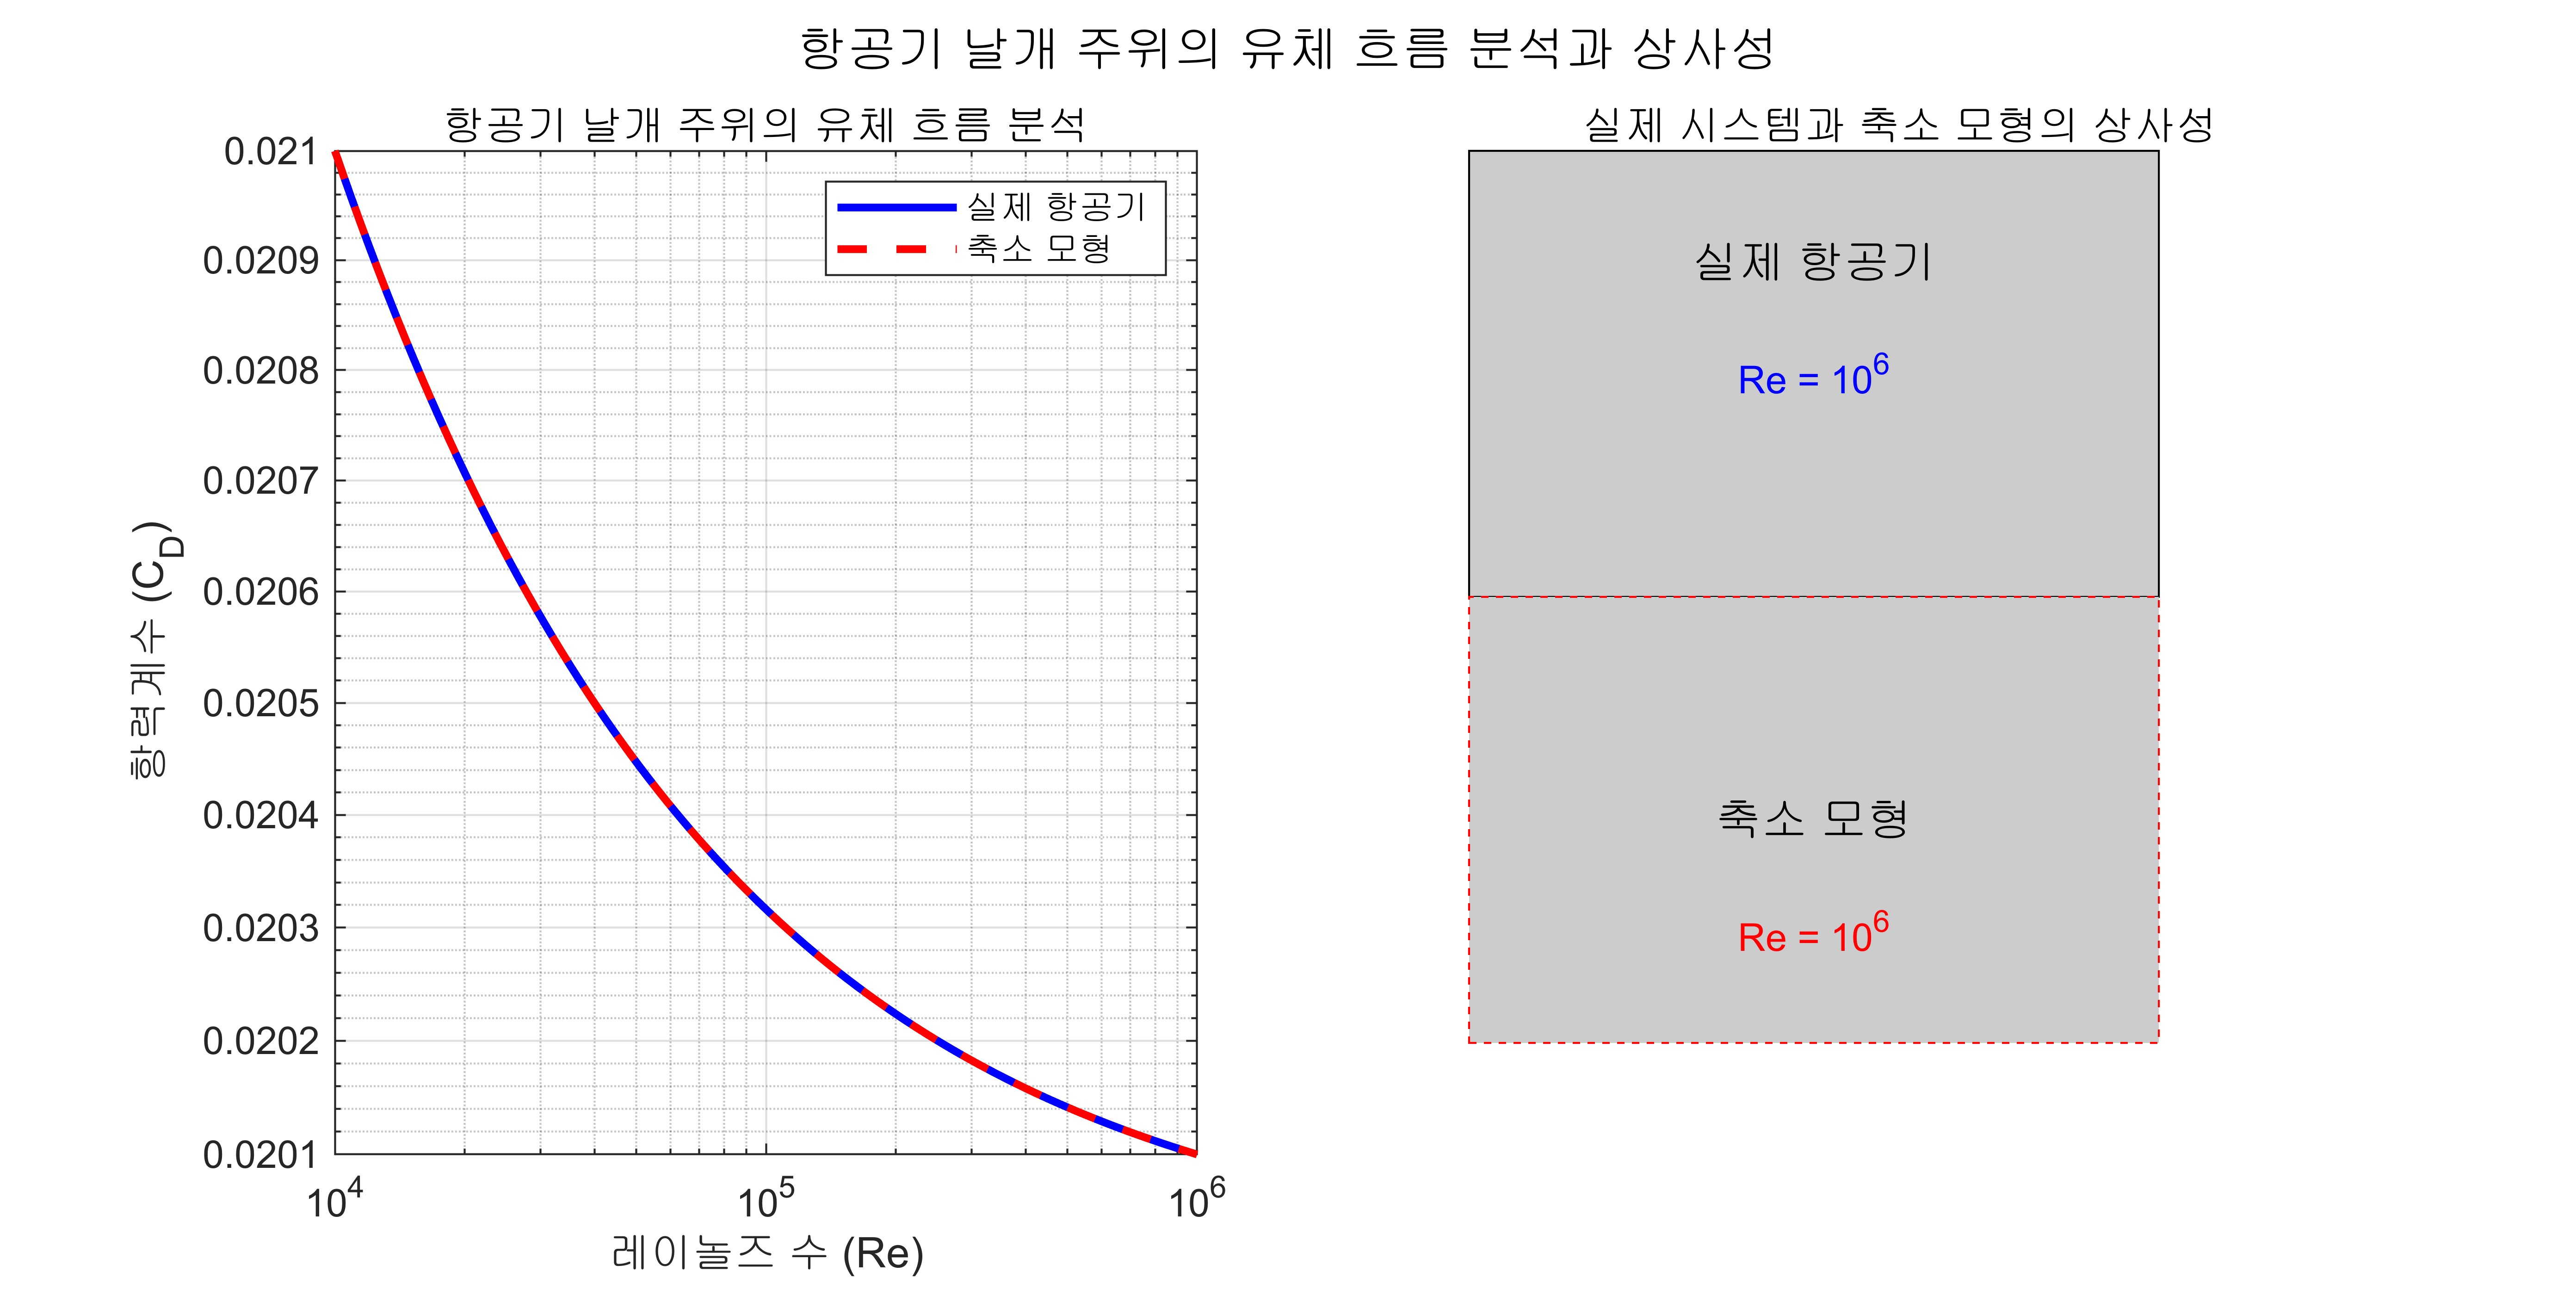

In [13]:
% 레이놀즈 수와 항력계수에 대한 데이터
Re_values = logspace(4, 6, 100);  % 레이놀즈 수 범위 (10^4 ~ 10^6)
Cd_values_actual = 0.02 + 0.1 ./ sqrt(Re_values);  % 실제 시스템에서의 항력계수 예시
Cd_values_model = 0.02 + 0.1 ./ sqrt(Re_values);  % 축소 모형에서의 항력계수 예시

% 시각화
figure;

% 1. 레이놀즈 수 vs 항력계수
subplot(1, 2, 1);
loglog(Re_values, Cd_values_actual, 'b-', 'LineWidth', 2, 'DisplayName', '실제 항공기');
hold on;
loglog(Re_values, Cd_values_model, 'r--', 'LineWidth', 2, 'DisplayName', '축소 모형');
xlabel('레이놀즈 수 (Re)');
ylabel('항력계수 (C_D)');
title('항공기 날개 주위의 유체 흐름 분석');
legend;
grid on;

% 2. 실제 시스템과 축소 모형의 비교
subplot(1, 2, 2);
hold on;
% 실제 시스템
rectangle('Position', [0.1 0.3 0.2 0.4], 'FaceColor', [0.8 0.8 0.8]);
text(0.2, 0.6, '실제 항공기', 'HorizontalAlignment', 'center', 'FontSize', 12);
text(0.2, 0.5, 'Re = 10^6', 'HorizontalAlignment', 'center', 'FontSize', 10, 'Color', 'b');
% 축소 모형
rectangle('Position', [0.1 0.3 - 0.4, 0.2, 0.4], 'FaceColor', [0.8 0.8 0.8], 'EdgeColor', 'r', 'LineStyle', '--');
text(0.2, 0.1, '축소 모형', 'HorizontalAlignment', 'center', 'FontSize', 12);
text(0.2, 0.0, 'Re = 10^6', 'HorizontalAlignment', 'center', 'FontSize', 10, 'Color', 'r');
title('실제 시스템과 축소 모형의 상사성');
axis off;

% 전체 그래프 제목 설정
sgtitle('항공기 날개 주위의 유체 흐름 분석과 상사성');

% 그래프 레이아웃 조정
set(gcf, 'Position', [100, 100, 1200, 600]);



**레이놀즈 수(Reynolds Number)**: 유체 역학에서 유체 흐름의 특성을 나타내는 중요한 무차원 수입니다.

-  유체의 관성력과 점성력의 비를 나타냅니다.
-  식: $Re=\frac{\rho vL}{\mu }$ ​
-  ρ: 유체의 밀도
-  v: 유속
-  L: 특징 길이
-  μ: 유체의 점성계수
-  레이놀즈 수가 작을 경우(예: $Re<2000$ ), 유체의 흐름은 층류가 되고, 레이놀즈 수가 클 경우(예: $Re>4000$ ) 난류가 됩니다.


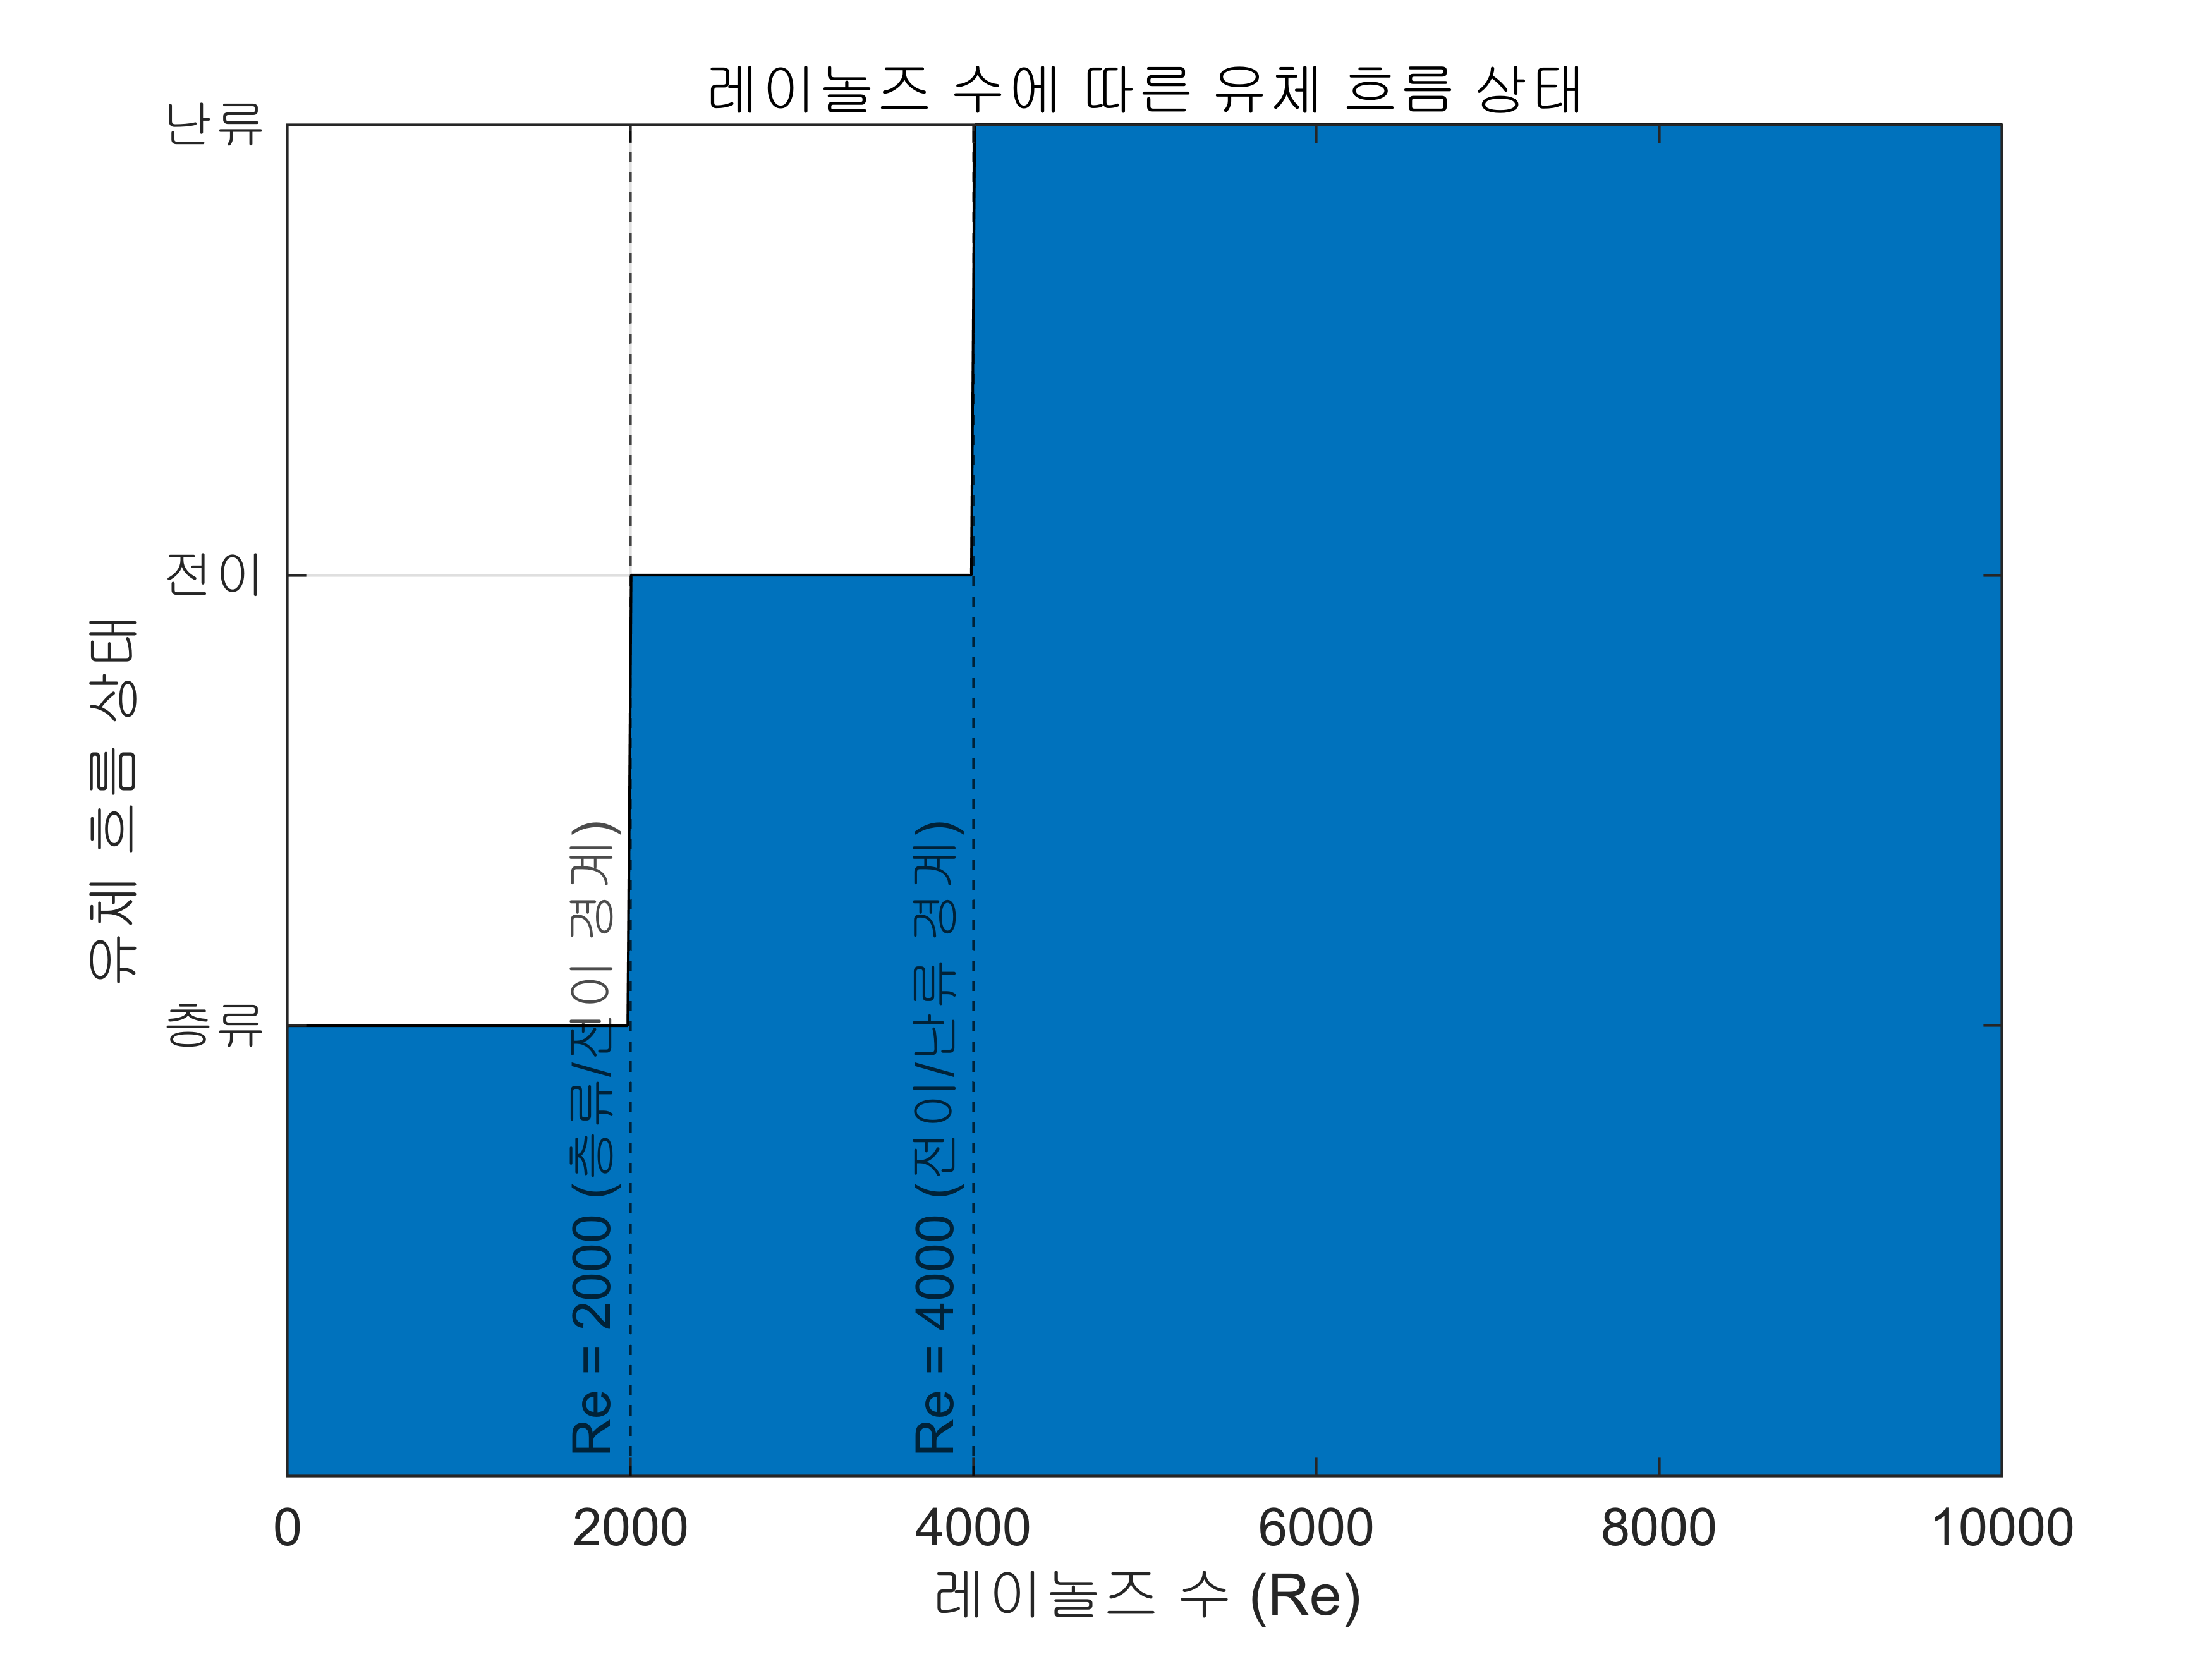

In [14]:
% 레이놀즈 수에 따른 유체 흐름 시각화

% 레이놀즈 수의 범위
Re = linspace(0, 10000, 500);

% 유체 흐름 상태 정의
flow_state = zeros(size(Re));
flow_state(Re < 2000) = 1; % 층류
flow_state(Re >= 2000 & Re <= 4000) = 2; % 전이 영역
flow_state(Re > 4000) = 3; % 난류

% 시각화
figure;
area(Re, flow_state);
colormap([0.6 0.8 1; 1 1 0.6; 1 0.6 0.6]);
title('레이놀즈 수에 따른 유체 흐름 상태');
xlabel('레이놀즈 수 (Re)');
ylabel('유체 흐름 상태');
yticks([1 2 3]);
yticklabels({'층류', '전이', '난류'});
grid on;

% 레이놀즈 수 기준선 추가
hold on;
xline(2000, '--k', 'Re = 2000 (층류/전이 경계)', 'LabelVerticalAlignment', 'bottom', 'LabelHorizontalAlignment', 'left');
xline(4000, '--k', 'Re = 4000 (전이/난류 경계)', 'LabelVerticalAlignment', 'bottom', 'LabelHorizontalAlignment', 'left');


**항력계수(Coefficient of Drag,** $C_D$ **​)**는 물체가 유체를 통과할 때 받는 저항력을 나타내는 무차원 수입니다. 항력계수는 유체의 속도, 물체의 형태, 표면 거칠기 등에 따라 달라집니다.

-  식: $C_D =\frac{F_D }{0.5\rho v^2 A}$ ​​
-  $F_D$ : 항력
-  ρ: 유체의 밀도
-  v: 유속
-  A: 단면적
-  이 무차원 수는 유체의 속도와 물체의 모양에 의존하지 않는 일반적인 저항 특성을 나타냅니다.

구, 원판, 그리고 유선형 물체의 항력계수를 비교



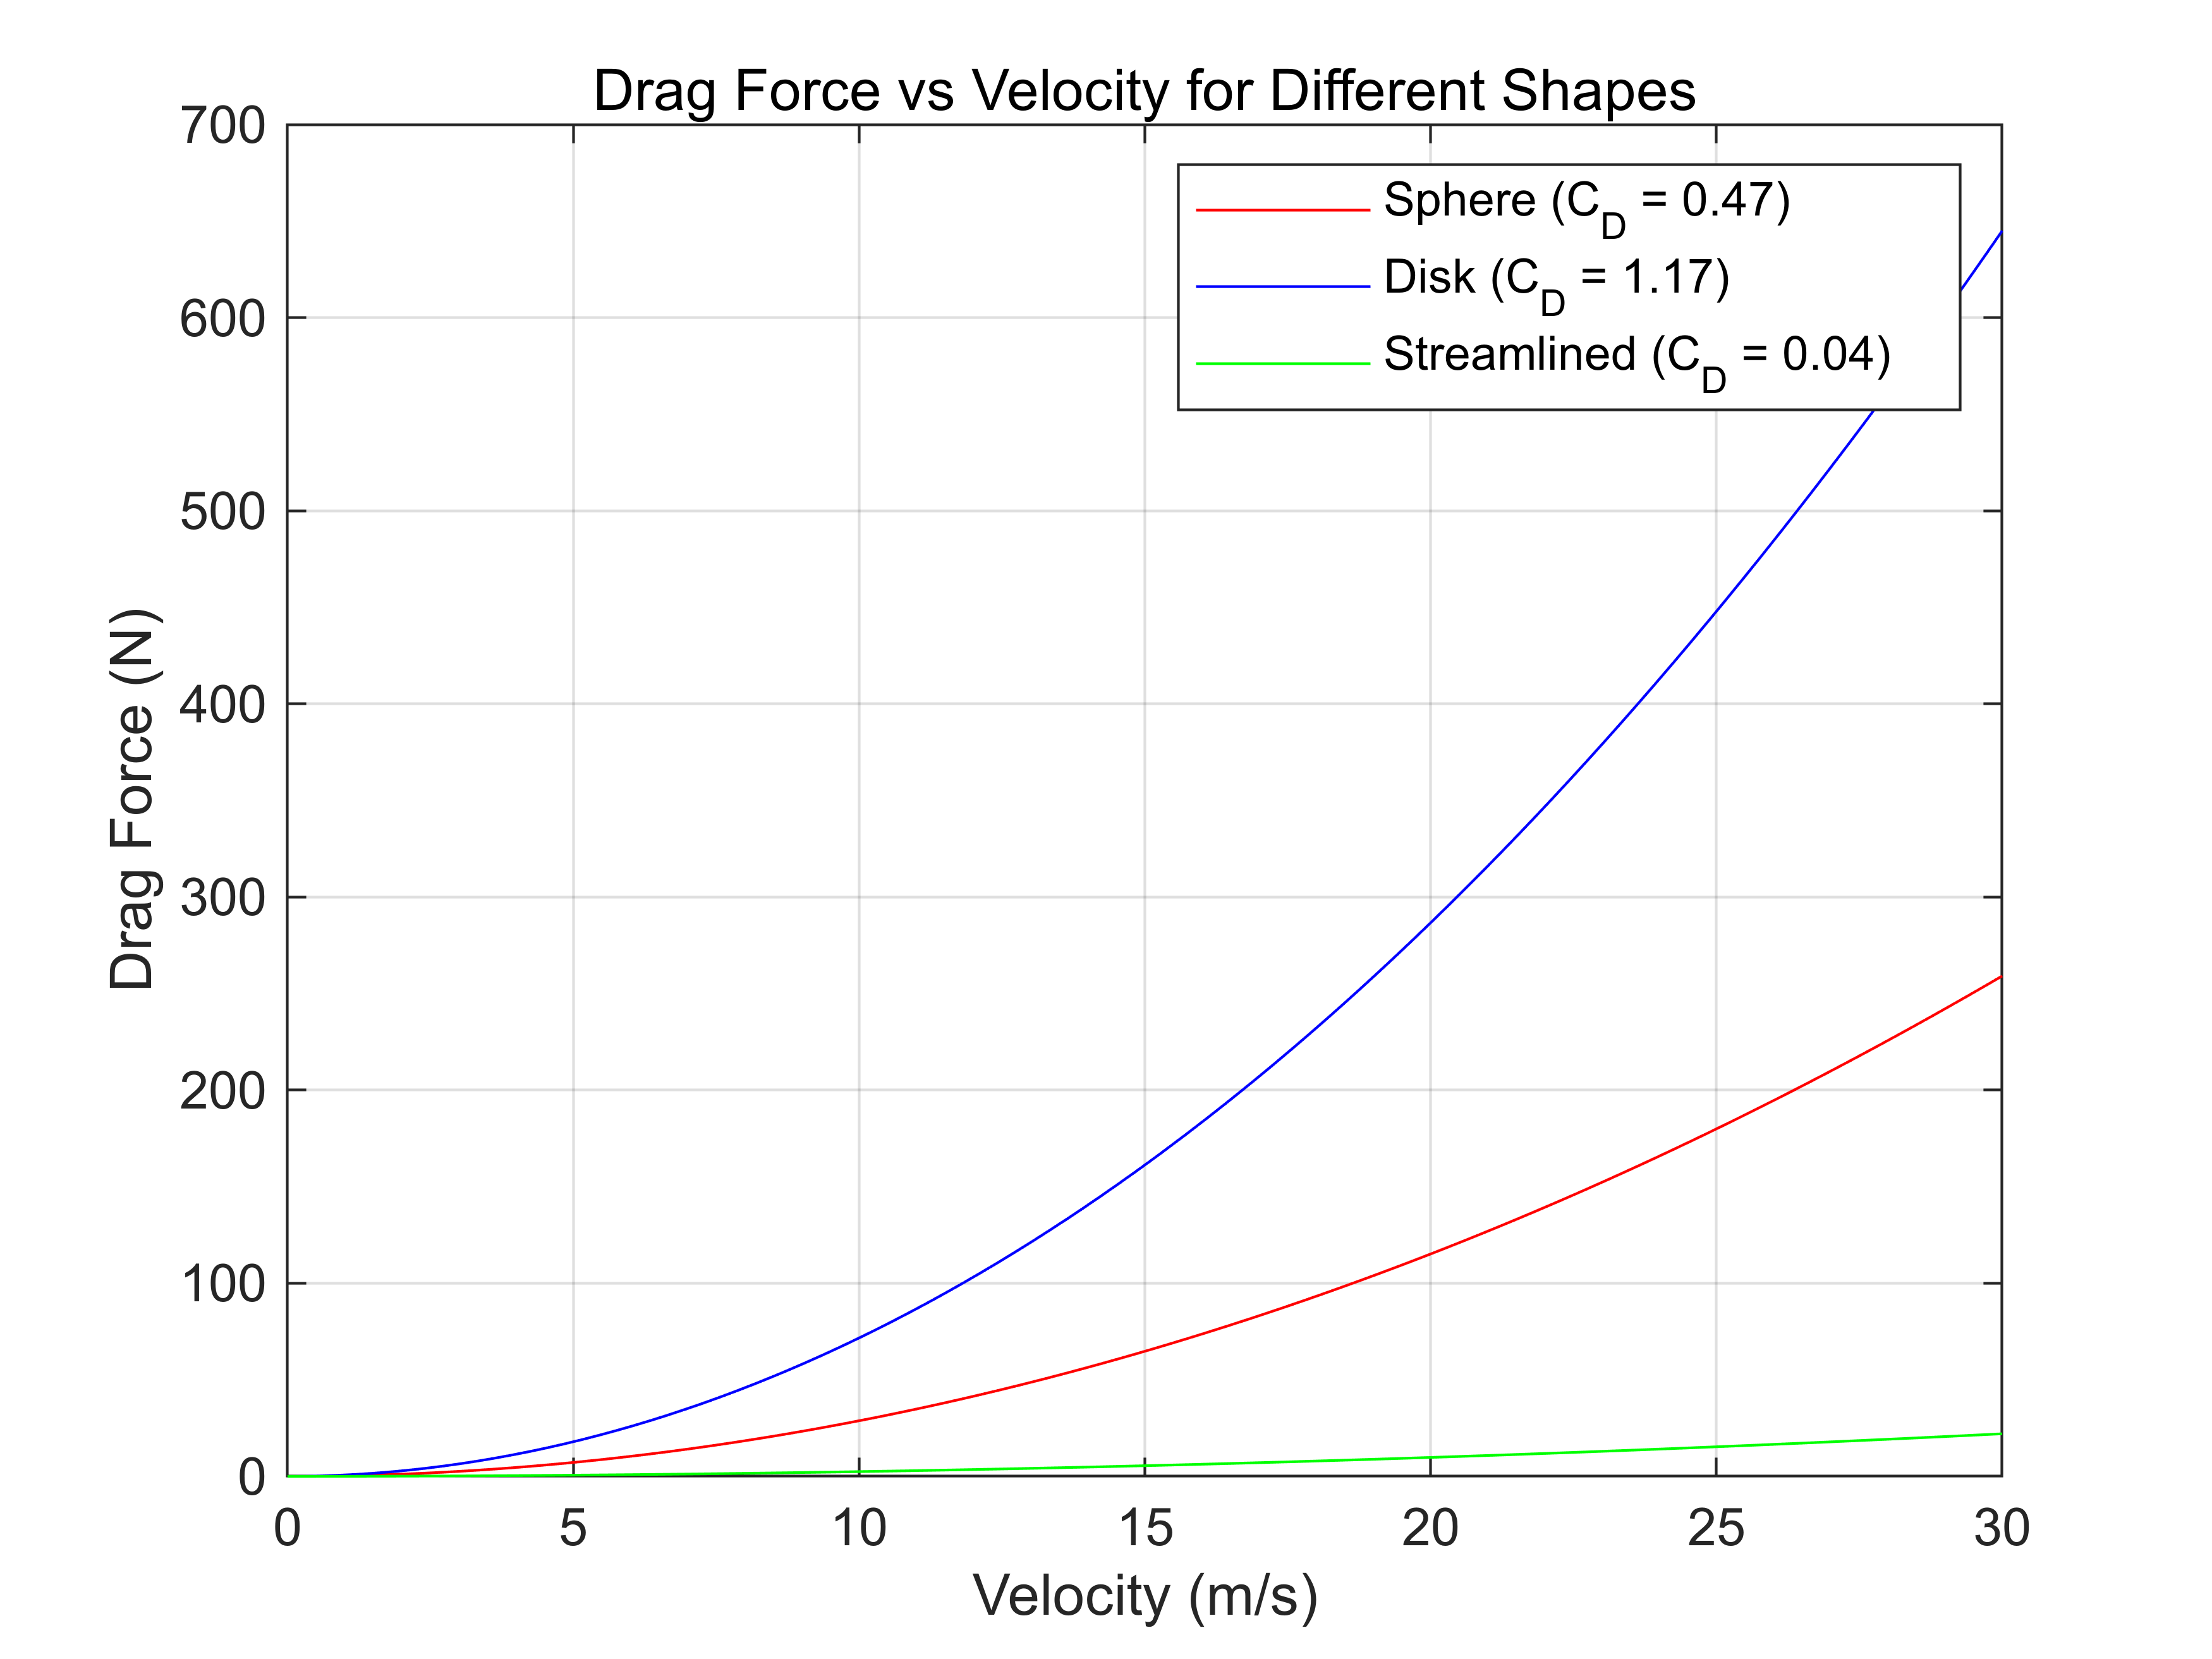

In [15]:
% 항력계수 시각화

% 속도 범위 (m/s)
velocity = linspace(0, 30, 100);

% 밀도 (공기의 밀도 가정, kg/m^3)
rho = 1.225;

% 단면적 (m^2)
A = 1;

% 항력계수 (다양한 물체 형태에 따른 값)
% 구, 원판, 유선형 물체에 대한 고정된 항력계수
C_D_sphere = 0.47;
C_D_disk = 1.17;
C_D_streamlined = 0.04;

% 항력 계산
F_D_sphere = 0.5 * rho * velocity.^2 * A * C_D_sphere;
F_D_disk = 0.5 * rho * velocity.^2 * A * C_D_disk;
F_D_streamlined = 0.5 * rho * velocity.^2 * A * C_D_streamlined;

% 시각화
figure;
plot(velocity, F_D_sphere, '-r', 'DisplayName', 'Sphere (C_D = 0.47)');
hold on;
plot(velocity, F_D_disk, '-b', 'DisplayName', 'Disk (C_D = 1.17)');
plot(velocity, F_D_streamlined, '-g', 'DisplayName', 'Streamlined (C_D = 0.04)');

xlabel('Velocity (m/s)');
ylabel('Drag Force (N)');
title('Drag Force vs Velocity for Different Shapes');
legend;
grid on;

-  속도가 증가할수록 항력도 증가합니다.
-  유선형 물체는 가장 낮은 항력계수를 가지며, 구와 원판에 비해 낮은 항력을 받습니다.

-  화학 반응의 반응속도식은 일반적으로 다음과 같이 표현됩니다:

$$r=k[A]^m [B]^n$$

-  r: 반응속도
-  k: 속도 상수
-  $[A],[B]$ : 반응물 A와 B의 농도
-  $m,n$ : 반응차수
-  속도 상수 k의 단위는 반응차수에 따라 달라지며, 이를 차원해석으로 확인할 수 있습니다.
-  예를 들어, 1차 반응에서 $r=k[A]:$
-  \[r\]의 차원: $\frac{mol}{L\cdot s}$ ​
-  \[A\]의 차원: $\frac{mol}{L}$ ​
-  따라서, k의 차원: $\frac{1}{s}$ ​
-  2차 반응에서 $r=k[A]^2$ 또는 $r=k[A][B]:$
-  \[r\]의 차원: $\frac{mol}{L\cdot s}$ ​
-  $[A]^2$ 의 차원: ${\left(\frac{mol}{L}\right)}^2 =\frac{mol^2 }{L^2 }$ ​
-  따라서, k의 차원: $\frac{L}{mol\cdot s}$ ​
-  이처럼 반응차수에 따라 속도 상수의 차원이 달라지며, 차원해석을 통해 이러한 관계를 명확히 파악할 수 있습니다.


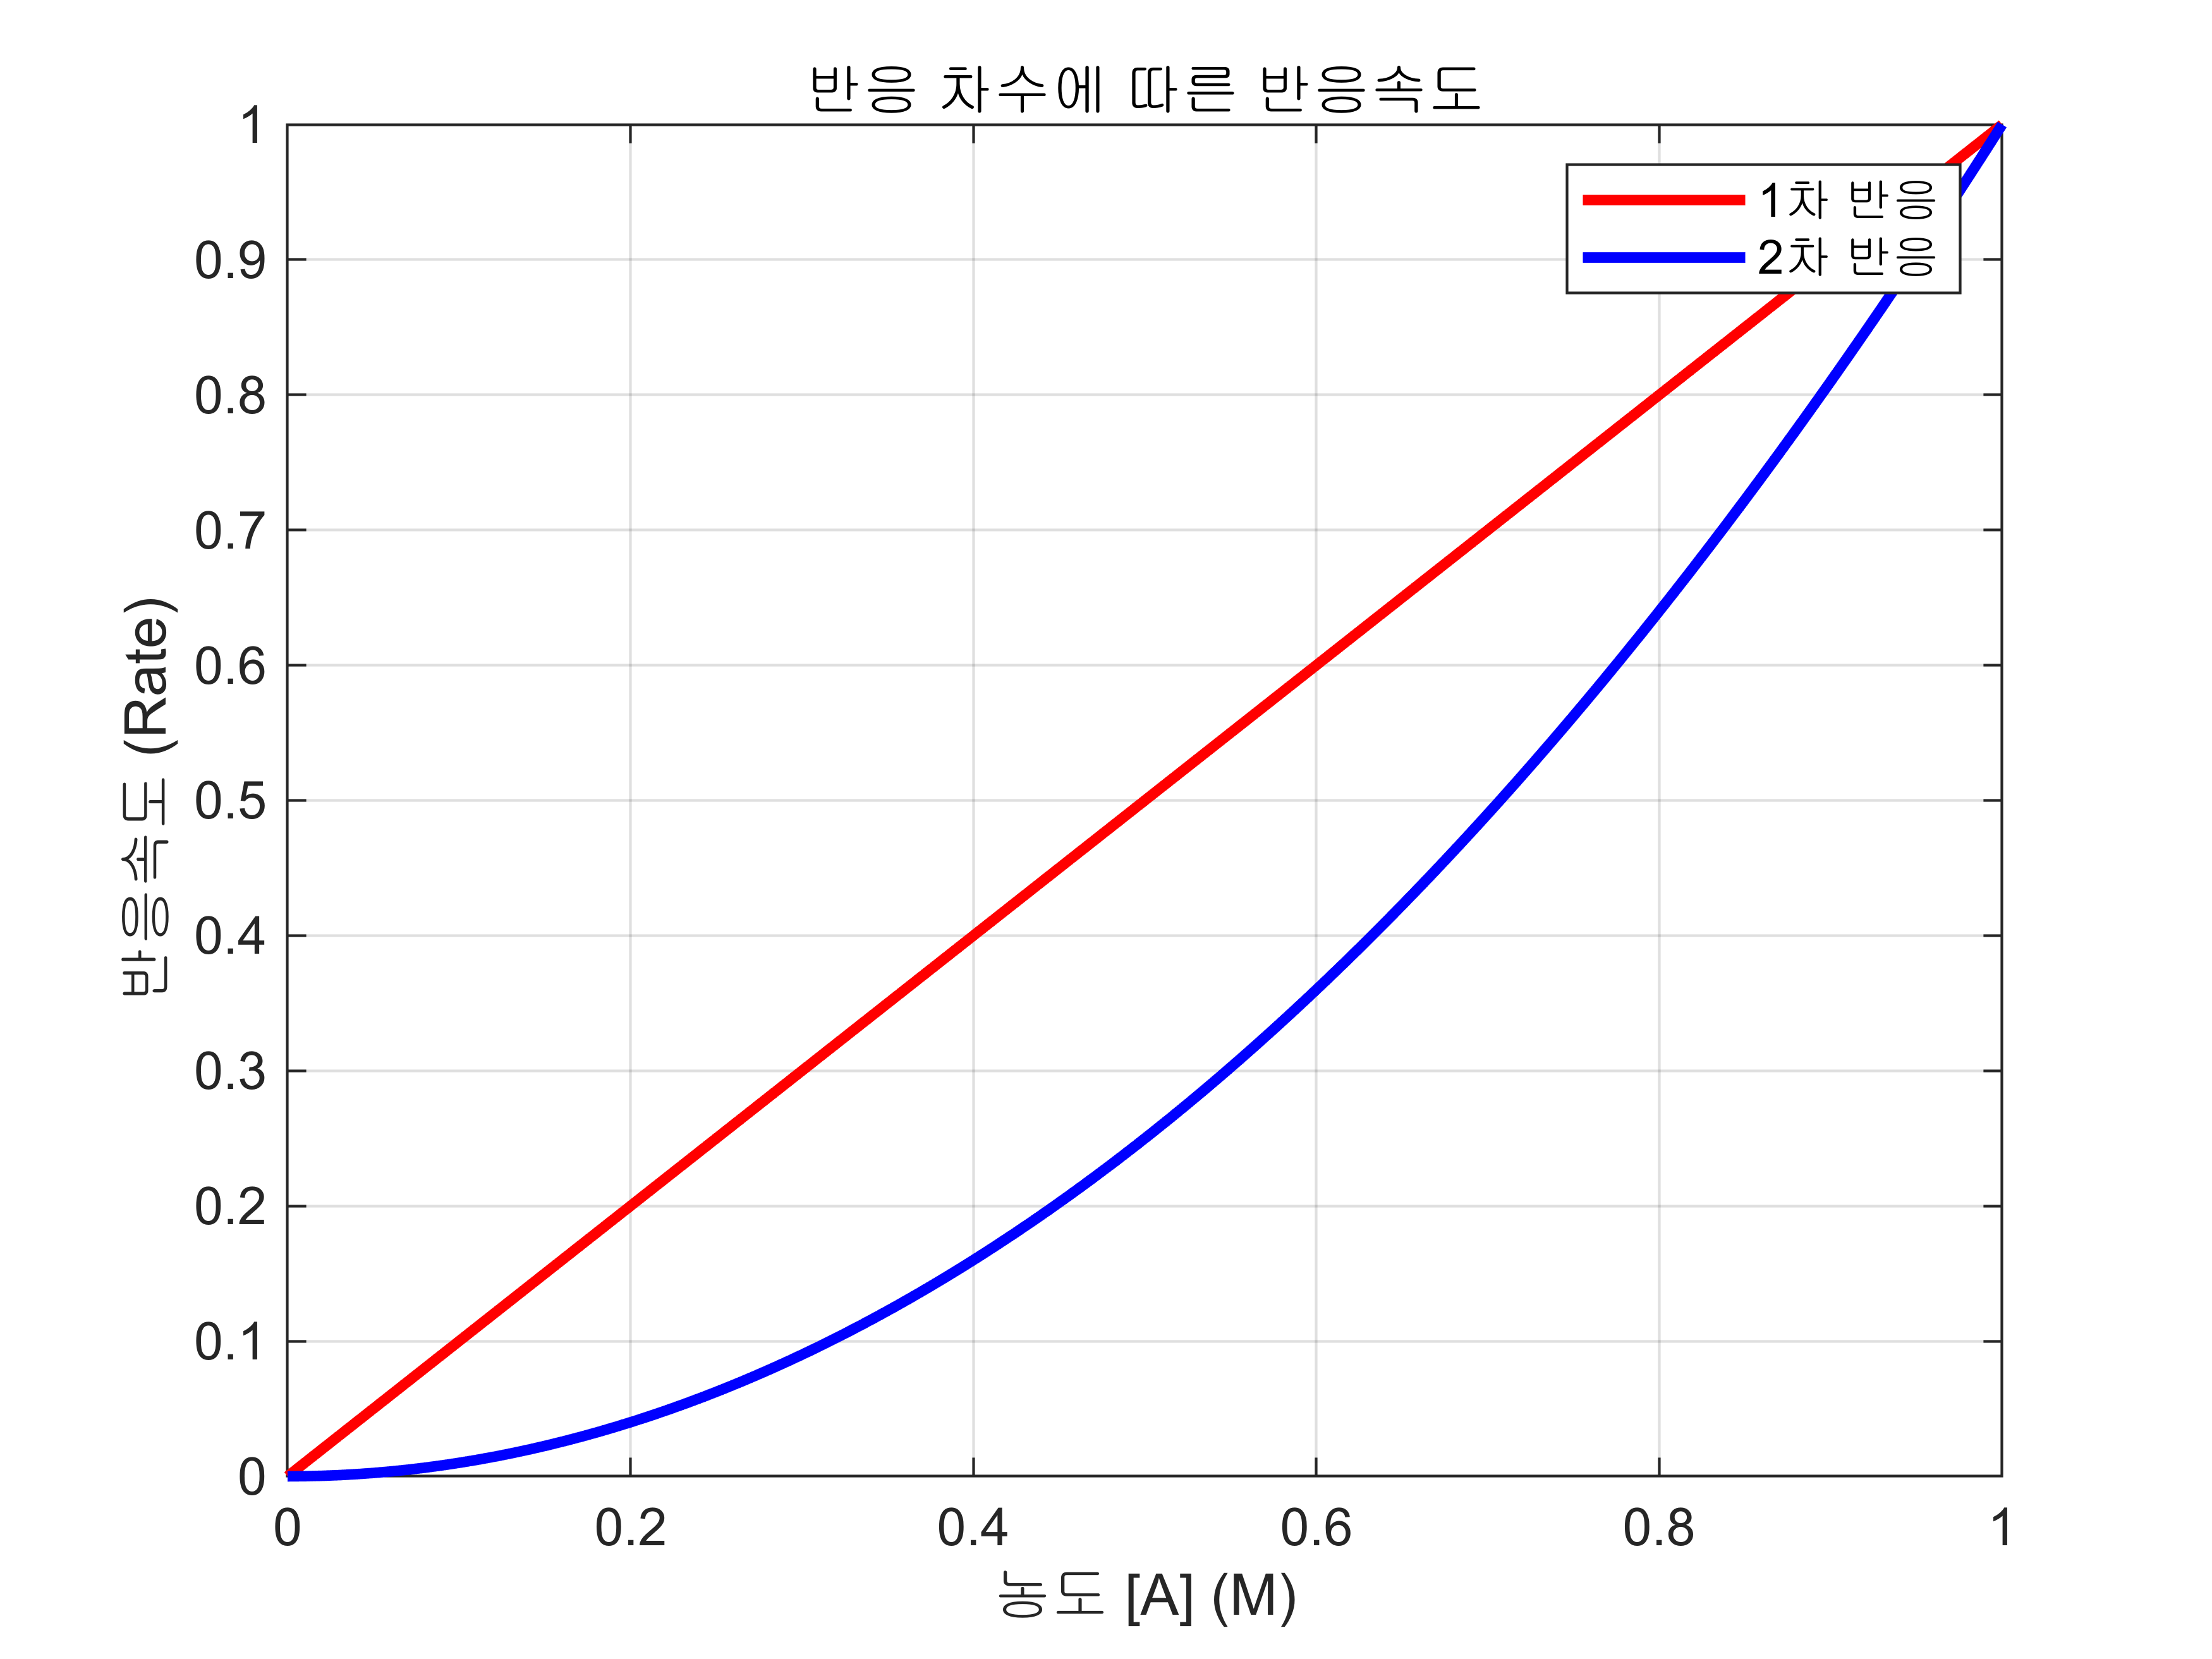

In [16]:
% 반응속도론 시각화

% 농도 범위 설정
concentration = linspace(0, 1, 100); % 농도 범위 (0 ~ 1 M)

% 속도 상수 설정
k1 = 1; % 1차 반응 속도 상수
k2 = 1; % 2차 반응 속도 상수

% 반응속도 계산
rate_first_order = k1 * concentration; % 1차 반응
rate_second_order = k2 * concentration.^2; % 2차 반응

% 시각화
figure;
plot(concentration, rate_first_order, '-r', 'LineWidth', 2, 'DisplayName', '1차 반응');
hold on;
plot(concentration, rate_second_order, '-b', 'LineWidth', 2, 'DisplayName', '2차 반응');

% 그래프 레이블 및 제목
xlabel('농도 [A] (M)');
ylabel('반응속도 (Rate)');
title('반응 차수에 따른 반응속도');
legend;
grid on;

-  **1차 반응**: 반응속도가 반응물의 농도에 선형적으로 비례하는 반응을 의미합니다. 반응속도식은 $r=k[A]$ 로 표현됩니다. 그래프에서 직선으로 나타납니다.
-  **2차 반응**: 반응속도가 반응물 농도의 제곱에 비례하는 반응을 의미합니다. 반응속도식은 $r=k[A]^2$ 로 표현됩니다. 그래프에서 포물선 형태로 나타납니다.
-  1차 반응의 경우, 농도가 증가함에 따라 반응속도가 선형적으로 증가합니다.
-  2차 반응의 경우, 농도가 증가함에 따라 반응속도가 기하급수적으로 증가하는 것을 확인할 수 있습니다.

-  확산은 입자나 분자가 농도가 높은 곳에서 낮은 곳으로 이동하는 현상으로, 이는 농도 구배, 확산 계수, 시간 등에 의존합니다.
-  화학 공정에서 물질의 확산은 반응기 설계, 분리 공정 등에 중요한 역할을 합니다.
-  차원해석을 통해 무차원 수인 **쉐르우드 수(Sherwood Number)**, **페클레 수(Peclet Number)** 등을 도출할 수 있습니다.

-  **쉐르우드 수 (Sh****)**: 물질 전달에서 대류에 의한 물질 이동과 분자 확산에 의한 물질 이동의 비율을 나타내는 무차원 수.

 $Sh=\frac{k_L L}{D}$ ​

-  $k_L$ ​: 물질 전달 계수
-  L: 특성 길이
-  D: 확산 계수

-  **페클레 수 (Pe****)**: 대류에 의한 물질 전달과 확산에 의한 물질 전달의 상대적인 중요성을 나타냄.

 $Pe=\frac{vL}{D}$ ​

-  v: 유속
-  L: 특성 길이
-  D: 확산 계수
-  이 무차원 수들은 화학 공정에서 확산과 대류의 상대적 중요성을 판단하는 데 사용됩니다.
-  예를 들어, 높은 페클레 수는 대류가 확산보다 더 지배적인 물질 전달 메커니즘임을 나타냅니다.


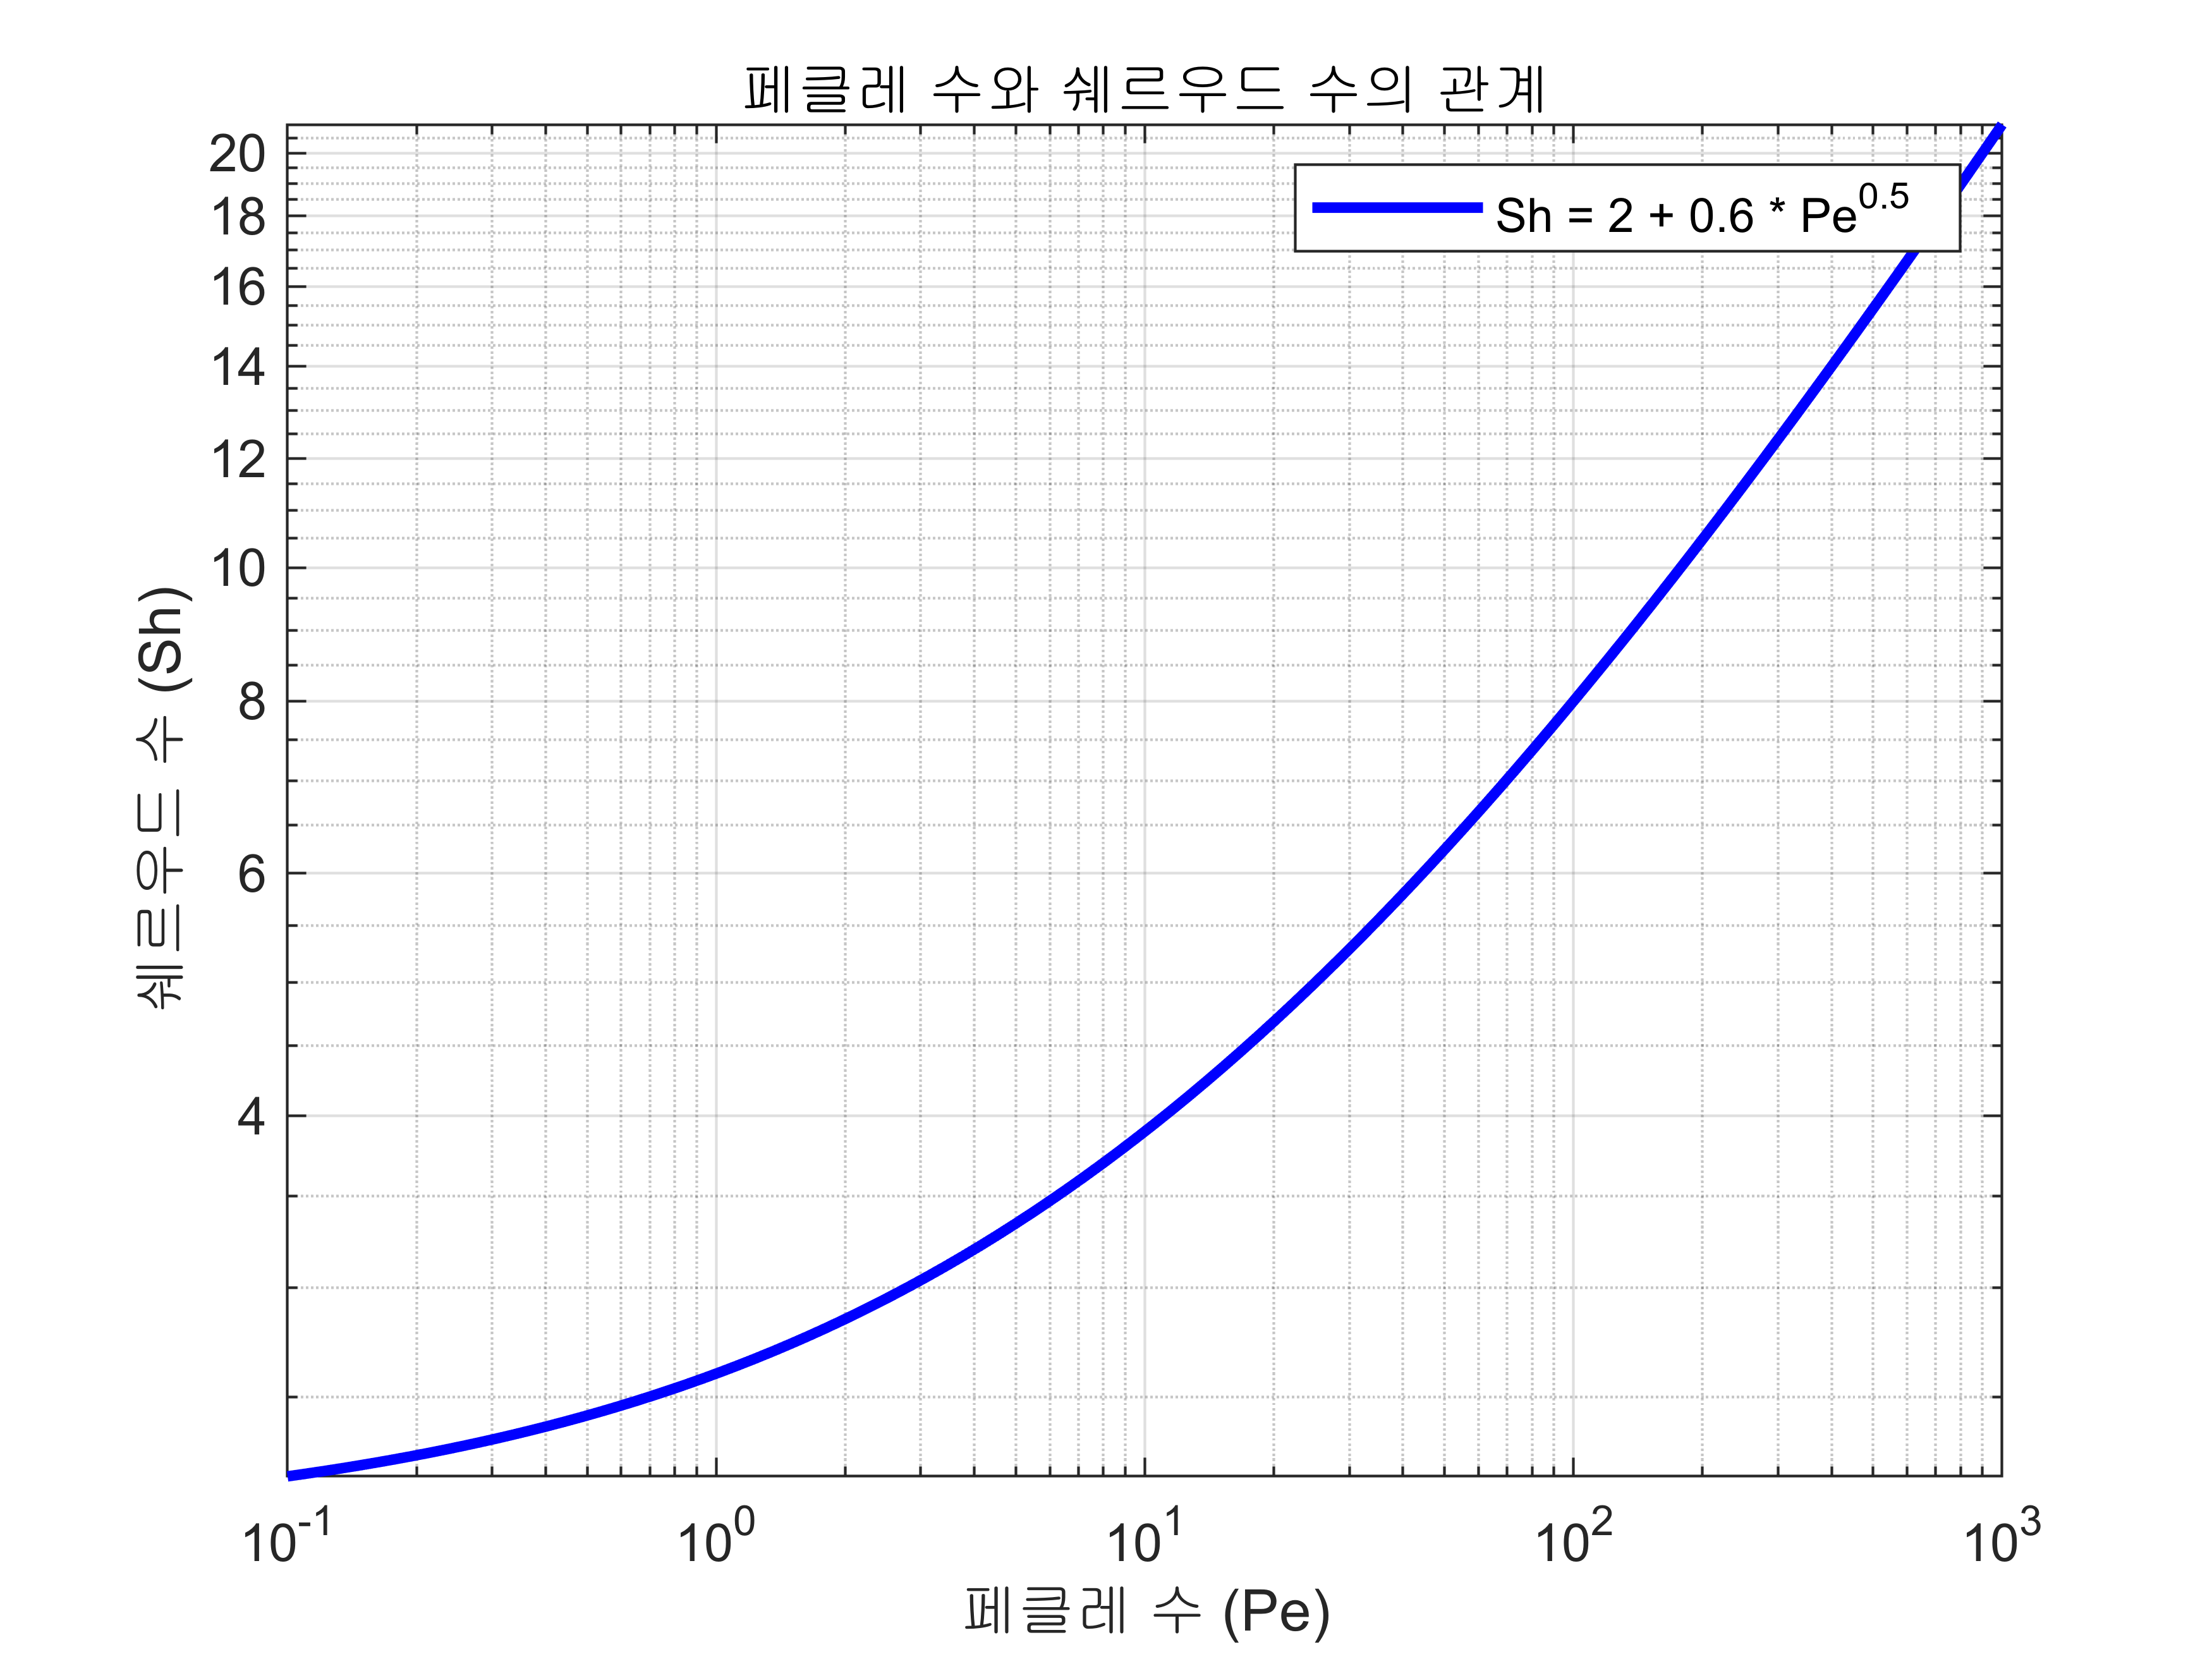

In [17]:
% 쉐르우드 수와 페클레 수 시각화

% 페클레 수의 범위 설정
Pe = logspace(-1, 3, 100); % 0.1부터 1000까지의 로그 스케일

% 쉐르우드 수 계산 (예시: Sh = 2 + 0.6 * Pe^0.5)
% 일반적으로 쉐르우드 수는 복잡한 관계를 가지지만 여기서는 단순한 관계로 표현
Sh = 2 + 0.6 * Pe.^0.5;

% 시각화
figure;
loglog(Pe, Sh, '-b', 'LineWidth', 2);
grid on;

% 그래프 레이블 및 제목
xlabel('페클레 수 (Pe)');
ylabel('쉐르우드 수 (Sh)');
title('페클레 수와 쉐르우드 수의 관계');
legend('Sh = 2 + 0.6 * Pe^{0.5}');

-  **페클레 수 (Pe):** 유체의 유속과 특성 길이 및 확산 계수를 기반으로 하는 무차원 수입니다.

 $Pe=\frac{vL}{D}$ ​

-  v: 유속
-  L: 특성 길이
-  D: 확산 계수
-  **쉐르우드 수 (Sh):** 유체의 물질 전달과 확산의 상대적 중요성을 나타내며, 페클레 수에 의존합니다.

$$Sh=2+0.6\times Pe^{0.5}$$

-  위 식은 쉐르우드 수를 간단히 나타내는 예제이며, 실제로는 시스템에 따라 더 복잡한 상관관계를 가질 수 있습니다.
-  **로그\-로그 그래프**: 페클레 수와 쉐르우드 수의 관계를 로그 스케일로 표시하여 광범위한 값을 시각화합니다.
-  **페클레 수의 증가**: 페클레 수가 증가함에 따라 쉐르우드 수도 증가하는 경향을 보입니다. 이는 대류에 의한 물질 전달이 확산에 의한 물질 전달에 비해 더 지배적이게 됨을 의미합니다.
